<a href="https://colab.research.google.com/github/noviardhana/data_wizards/blob/master/flight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UNSUPERVISED LEARNING Homework

Data Wizards

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway, chi2_contingency
from sklearn.feature_selection import mutual_info_classif

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

sns.set_style('whitegrid')

## Import Dataset

In [2]:
!gdown --id 14G4xOWK5e-QQ9S7GmBwULChNdeJZXs2U # Download File

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14G4xOWK5e-QQ9S7GmBwULChNdeJZXs2U
To: /content/flight.csv
100% 8.94M/8.94M [00:00<00:00, 30.2MB/s]


In [3]:
data = pd.read_csv('flight.csv')
df = data.copy()

In [4]:
df.head()

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
0      54993  11/2/2006        12/24/2008   Male         6            .   
1      28065  2/19/2007          8/3/2007   Male         6          NaN   
2      55106   2/1/2007         8/30/2007   Male         6            .   
3      21189  8/22/2008         8/23/2008   Male         5  Los Angeles   
4      39546  4/10/2009         4/15/2009   Male         6      guiyang   

  WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
0       beijing           CN  31.0  3/31/2014  ...  234188.0      580717   
1       beijing           CN  42.0  3/31/2014  ...  167434.0      293678   
2       beijing           CN  40.0  3/31/2014  ...  164982.0      283712   
3            CA           US  64.0  3/31/2014  ...  125500.0      281336   
4       guizhou           CN  48.0  3/31/2014  ...  130702.0      309928   

   LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  EXCHANGE_COUNT  \
0         3/31/2014            1      3.483254           18              34   
1         3/25/2014            7      5.194245           17              29   
2         3/21/2014           11      5.298507           18              20   
3        12/26/2013           97     27.863636           73              11   
4         3/27/2014            5      4.788079           47              27   

   avg_discount  Points_Sum  Point_NotFlight  
0      0.961639      619760               50  
1      1.252314      415768               33  
2      1.254676      406361               26  
3      1.090870      372204               12  
4      0.970658      338813               39  

[5 rows x 23 columns]

# Feature Desc

| No | Column            | Description                                                          |
|----|-------------------|----------------------------------------------------------------------|
| 1  | MEMBER_NO         | ID Member                                                            |
| 2  | FFP_DATE          | Frequent Flyer Program Join Date                                     |
| 3  | FIRST_FLIGHT_DATE | Tanggal Penerbangan pertama                                          |
| 4  | GENDER            | Jenis Kelamin                                                        |
| 5  | FFP_TIER          | Tier dari Frequent Flyer Program                                     |
| 6  | WORK_CITY         | Kota Asal                                                            |
| 7  | WORK_PROVINCE     | Provinsi Asal                                                        |
| 8  | WORK_COUNTRY      | Negara Asal                                                          |
| 9  | AGE               | Umur Customer                                                        |
| 10 | LOAD_TIME         | Tanggal data diambil                                                 |
| 11 | FLIGHT_COUNT      | Jumlah penerbangan Customer                                          |
| 12 | BP_SUM            | Rencana Perjalanan                                                   |
| 13 | SUM_YR_1          | Fare Revenue                                                         |
| 14 | SUM_YR_2          | Votes Prices                                                         |
| 15 | SEG_KM_SUM        | Total jarak(km) penerbangan yg sudah dilakukan                       |
| 16 | LAST_FLIGHT_DATE  | Tanggal penerbangan terakhir                                         |
| 17 | LAST_TO_END       | Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir |
| 18 | AVG_INTERVAL      | Rata-rata jarak waktu                                                |
| 19 | MAX_INTERVAL      | Maksimal jarak waktu                                                 |
| 20 | EXCHANGE_COUNT    | Jumlah penukaran                                                     |
| 21 | avg_discount      | Rata rata discount yang didapat customer                             |
| 22 | Points_Sum        | Jumlah poin yang didapat customer                                    |
| 23 | Point_NotFlight   | point yang tidak digunakan oleh members                              |

Insight yang dapat diambil dari dataset ini adalah:
- Data ini berkaitan dengan program frequent flyer yang digunakan oleh suatu maskapai penerbangan. Dalam program ini, pelanggan akan mendapatkan poin setiap kali melakukan penerbangan dengan maskapai tersebut, dan poin tersebut dapat ditukar dengan berbagai keuntungan seperti diskon, upgrade kelas penerbangan, dan lain sebagainya.
- Dataset ini terdiri dari 23 kolom yang berisi informasi mengenai identitas dan aktivitas pelanggan dalam program frequent flyer tersebut.
- Kolom-kolom tersebut dapat dibagi menjadi beberapa kategori, yaitu:
    - Kolom identitas: MEMBER_NO, GENDER, AGE, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY.
    - Kolom aktivitas penerbangan: FFP_DATE, FIRST_FLIGHT_DATE, FFP_TIER, FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, LAST_FLIGHT_DATE, LAST_TO_END, AVG_INTERVAL, MAX_INTERVAL.
    - Kolom keuntungan: EXCHANGE_COUNT, avg_discount, Points_Sum, Point_NotFlight.
- Dalam kolom aktivitas penerbangan, SUM_YR_1 dan SUM_YR_2 berkaitan dengan pendapatan yang diperoleh dari penerbangan, sedangkan SEG_KM_SUM merupakan total jarak yang telah diterbangi oleh pelanggan. Kolom-kolom ini dapat memberikan informasi mengenai seberapa sering pelanggan melakukan penerbangan dan seberapa besar pengaruhnya terhadap pendapatan maskapai.
- Kolom keuntungan seperti avg_discount, Points_Sum, dan Point_NotFlight dapat memberikan informasi mengenai seberapa besar keuntungan yang diperoleh oleh pelanggan dari program frequent flyer tersebut. Kolom Points_Sum dan Point_NotFlight berkaitan dengan jumlah poin yang didapatkan oleh pelanggan dan cara pemanfaatannya, sedangkan kolom avg_discount berkaitan dengan diskon yang diberikan kepada pelanggan.

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [6]:
c = df.shape[0]
df.shape

(62988, 23)

In [7]:
null_columns = df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())

GENDER              3
WORK_CITY        2269
WORK_PROVINCE    3248
WORK_COUNTRY       26
AGE               420
SUM_YR_1          551
SUM_YR_2          138
dtype: int64


In [8]:
df.duplicated().any()

False

Terdapat beberapa fitur dengan nilai null dan tidak ditemukan nilai yang duplikat. 

In [9]:
df[null_columns].isnull().sum()/df.shape[0]*100

GENDER           0.004763
WORK_CITY        3.602273
WORK_PROVINCE    5.156538
WORK_COUNTRY     0.041278
AGE              0.666794
SUM_YR_1         0.874770
SUM_YR_2         0.219089
dtype: float64

Persentase data yang hilang paling tinggi berada pada fitur `WORK_PROVINCE` yaitu **5.15%**. Sehingga row yang memiliki nilai null akan didrop

In [10]:
df.dropna(subset = null_columns, inplace = True)

In [11]:
def parse_date(df):
    date_cols = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
    for col in date_cols:
        try:
            df[col] = pd.to_datetime(df[col])
        except:
            print(f"Error parsing date column: {col}")
    return df[date_cols]

parse_date(df)

# convert the columns to datetime format, with invalid values set to NaT
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], errors='coerce')

# identify the rows with invalid values and drop them
df = df.dropna(subset=['LAST_FLIGHT_DATE'])

Error parsing date column: LAST_FLIGHT_DATE


In [12]:
df.describe(include='number')

MEMBER_NO      FFP_TIER           AGE  FLIGHT_COUNT         BP_SUM  \
count  57860.000000  57860.000000  57860.000000  57860.000000   57860.000000   
mean   31543.210854      4.104666     42.233253     12.043000   11047.843726   
std    18182.130529      0.378206      9.763364     14.239523   16294.179086   
min        3.000000      4.000000      6.000000      2.000000       0.000000   
25%    15794.750000      4.000000     35.000000      3.000000    2599.750000   
50%    31591.500000      4.000000     41.000000      7.000000    5814.000000   
75%    47307.250000      4.000000     48.000000     15.000000   12976.250000   
max    62988.000000      6.000000    110.000000    213.000000  505308.000000   

            SUM_YR_1       SUM_YR_2     SEG_KM_SUM  LAST_TO_END  AVG_INTERVAL  \
count   57860.000000   57860.000000   57860.000000  57860.00000  57860.000000   
mean     5363.816955    5679.279658   17324.371863    172.20598     67.963638   
std      8110.434363    8714.783954   20982.734648    180.80718     77.533059   
min         0.000000       0.000000     368.000000      1.00000      0.000000   
25%      1020.000000     833.000000    4882.000000     28.00000     23.666667   
50%      2804.000000    2830.000000   10208.000000    105.00000     44.812500   
75%      6584.000000    6931.000000   21519.000000    259.25000     82.000000   
max    239560.000000  234188.000000  580717.000000    731.00000    728.000000   

       MAX_INTERVAL  EXCHANGE_COUNT  avg_discount     Points_Sum  \
count  57860.000000    57860.000000  57860.000000   57860.000000   
mean     167.221673        0.327981      0.720626   12721.368960   
std      122.901236        1.149762      0.183942   20621.601695   
min        0.000000        0.000000      0.000000       0.000000   
25%       81.000000        0.000000      0.612019    2863.000000   
50%      144.000000        0.000000      0.711429    6468.000000   
75%      228.000000        0.000000      0.808333   14491.000000   
max      728.000000       46.000000      1.500000  985572.000000   

       Point_NotFlight  
count     57860.000000  
mean          2.819703  
std           7.497873  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max         140.000000

In [13]:
df.describe(include='object')

GENDER  WORK_CITY WORK_PROVINCE WORK_COUNTRY
count   57860      57860         57860        57860
unique      2       2935          1123          105
top      Male  guangzhou     guangdong           CN
freq    44127       9223         17215        54572

In [14]:
df["GENDER"].value_counts()

Male      44127
Female    13733
Name: GENDER, dtype: int64

In [15]:
df["WORK_COUNTRY"].value_counts()

CN    54572
KR      712
JP      709
US      475
HK      371
      ...  
AB        1
CD        1
NO        1
CM        1
CC        1
Name: WORK_COUNTRY, Length: 105, dtype: int64

In [16]:
df["WORK_PROVINCE"].value_counts()

guangdong           17215
beijing              7645
shanghai             4623
liaoning             4020
xinjiang             2412
                    ...  
YAMANASHI-PREF          1
KYORO-PREFECTURE        1
TIANJIN                 1
Jiangsu                 1
JAWATIMUR               1
Name: WORK_PROVINCE, Length: 1123, dtype: int64

In [17]:
df.describe(include='datetime', datetime_is_numeric=True)

FFP_DATE              FIRST_FLIGHT_DATE  \
count                          57860                          57860   
mean   2010-03-31 08:34:34.635326720  2010-09-24 06:33:50.833045248   
min              2004-11-01 00:00:00            1905-12-31 00:00:00   
25%              2008-05-06 00:00:00            2009-01-22 00:00:00   
50%              2010-11-17 00:00:00            2011-05-25 00:00:00   
75%              2012-04-09 00:00:00            2012-08-04 00:00:00   
max              2013-03-31 00:00:00            2015-04-03 00:00:00   

                           LOAD_TIME               LAST_FLIGHT_DATE  
count                          57860                          57860  
mean   2014-03-31 00:00:00.000000256  2013-10-11 12:36:09.706187264  
min              2014-03-31 00:00:00            2012-04-01 00:00:00  
25%              2014-03-31 00:00:00            2013-07-16 18:00:00  
50%              2014-03-31 00:00:00            2013-12-18 00:00:00  
75%              2014-03-31 00:00:00            2014-03-04 00:00:00  
max              2014-03-31 00:00:00            2014-03-31 00:00:00

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57860 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          57860 non-null  int64         
 1   FFP_DATE           57860 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  57860 non-null  datetime64[ns]
 3   GENDER             57860 non-null  object        
 4   FFP_TIER           57860 non-null  int64         
 5   WORK_CITY          57860 non-null  object        
 6   WORK_PROVINCE      57860 non-null  object        
 7   WORK_COUNTRY       57860 non-null  object        
 8   AGE                57860 non-null  float64       
 9   LOAD_TIME          57860 non-null  datetime64[ns]
 10  FLIGHT_COUNT       57860 non-null  int64         
 11  BP_SUM             57860 non-null  int64         
 12  SUM_YR_1           57860 non-null  float64       
 13  SUM_YR_2           57860 non-null  float64       
 14  SEG_KM

In [19]:
(1-df.shape[0]/c)*100

8.141233250777924

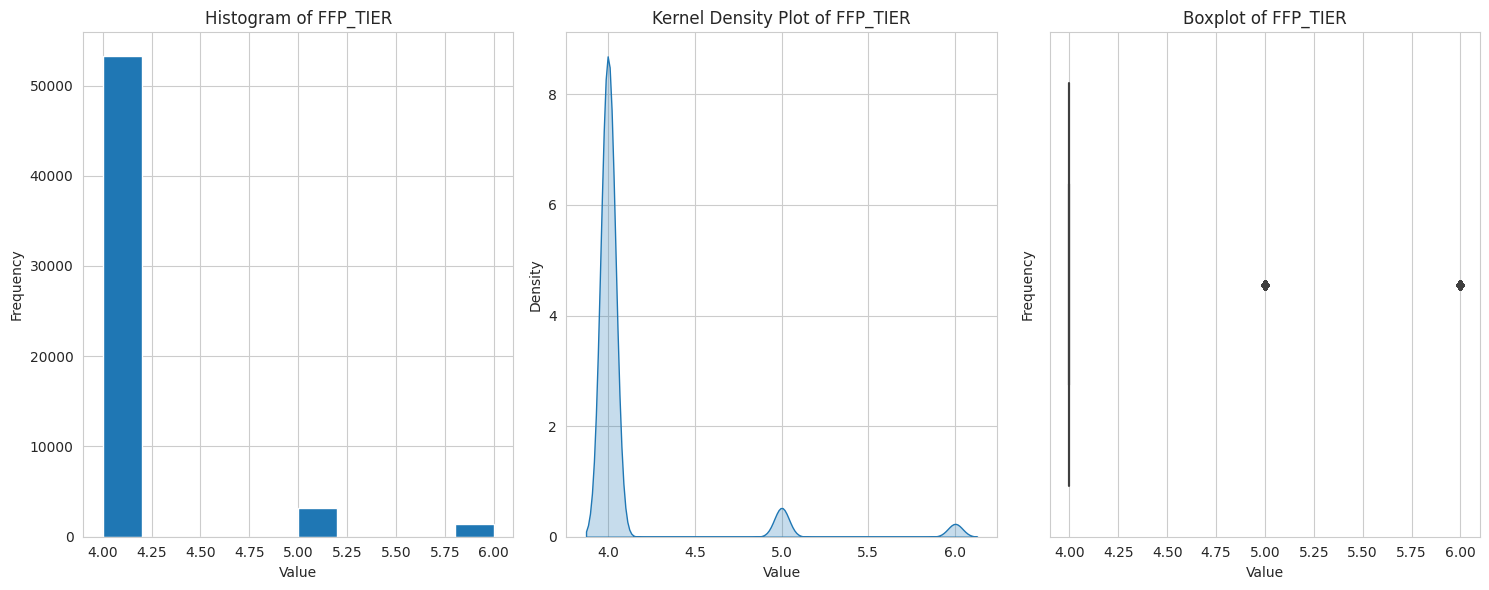

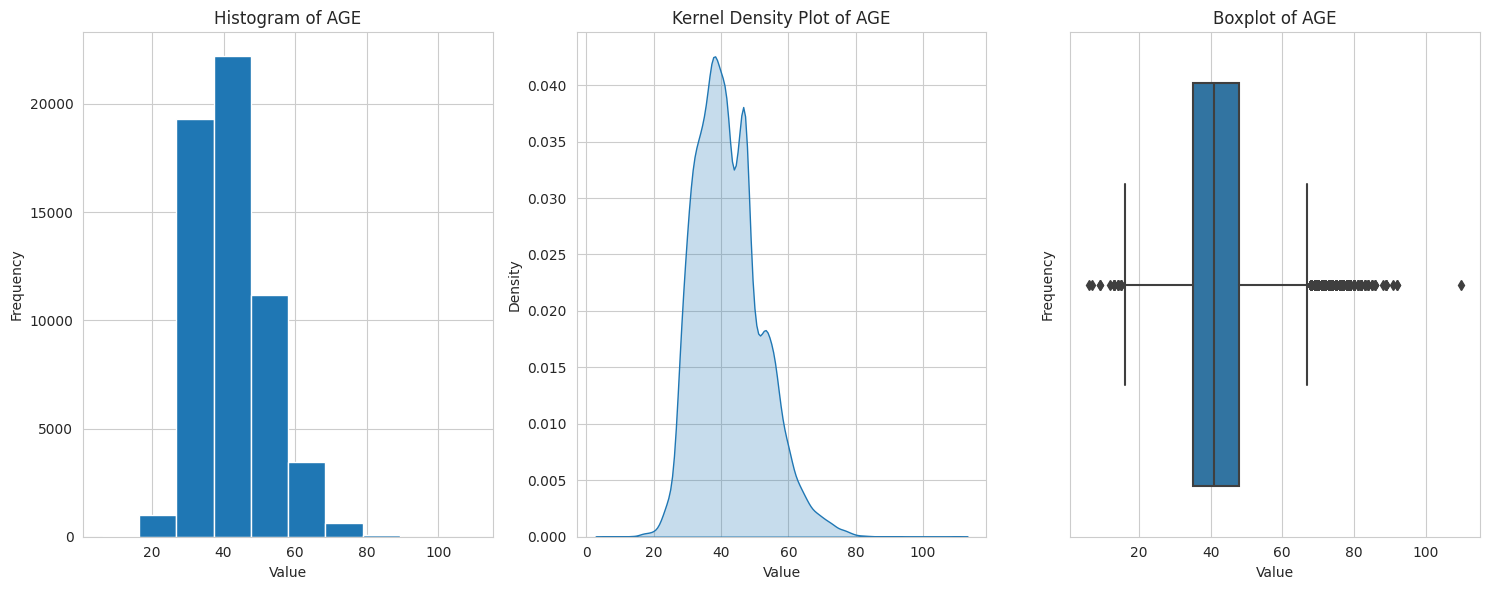

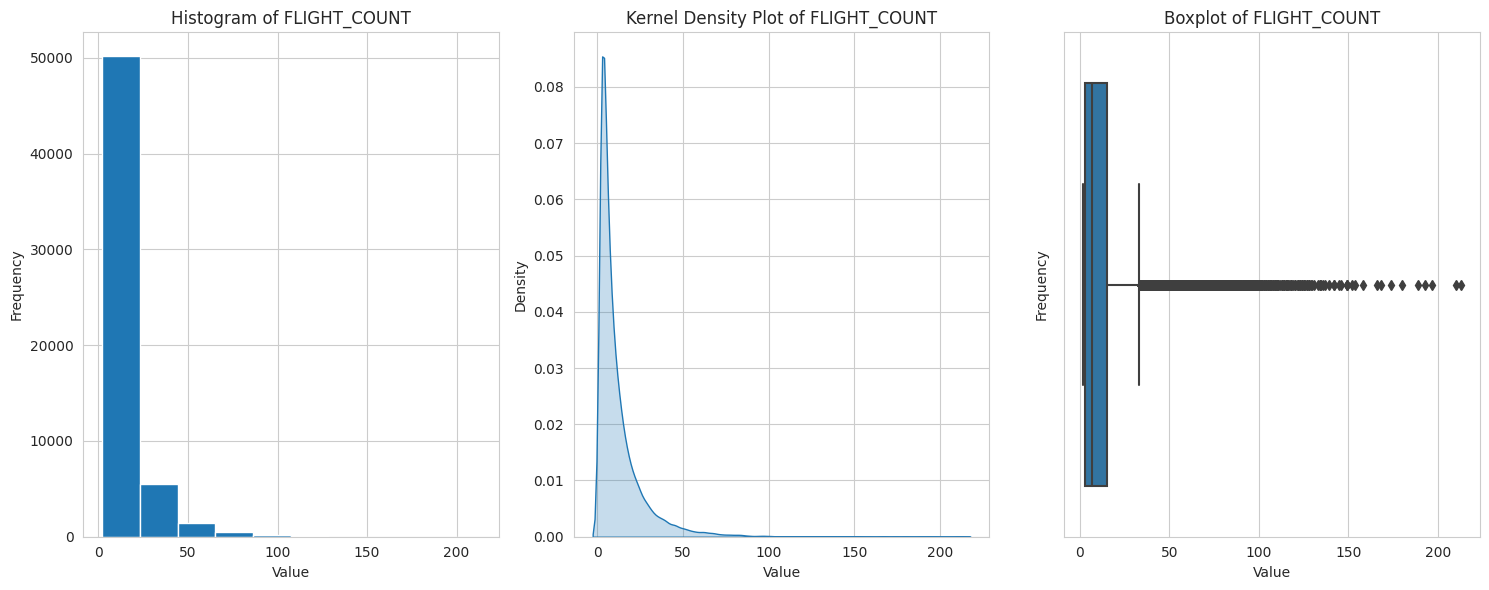

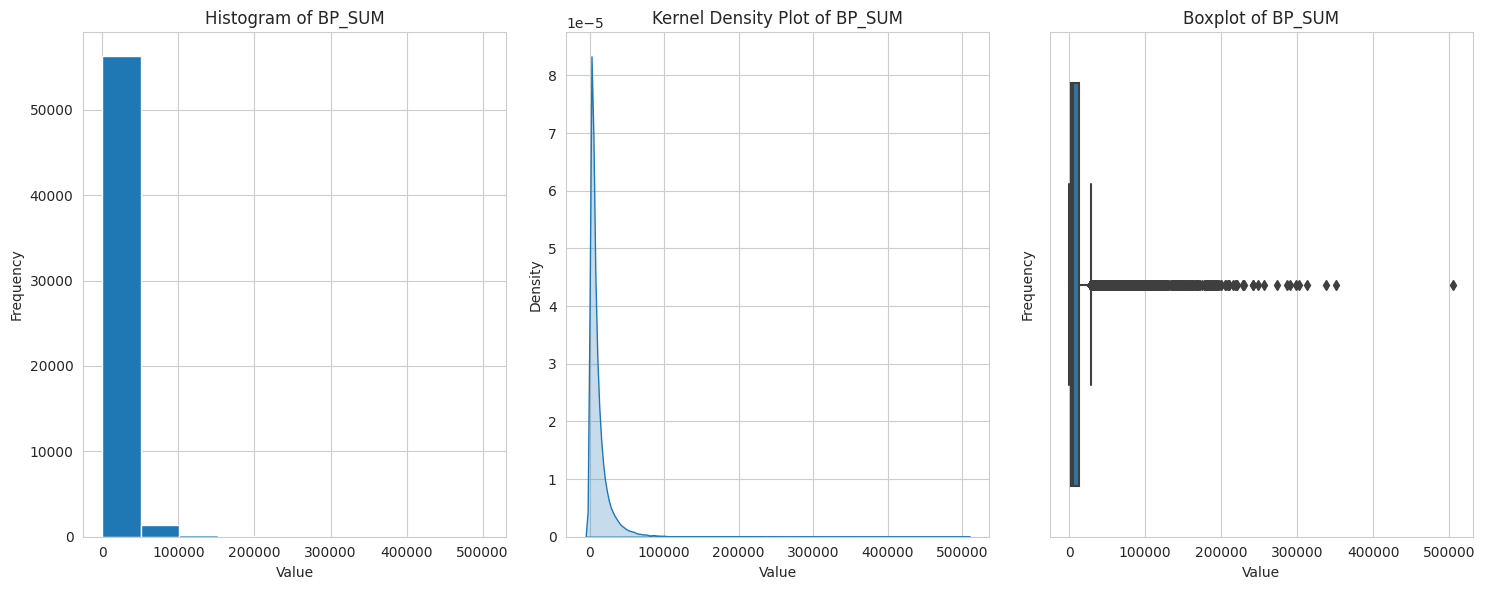

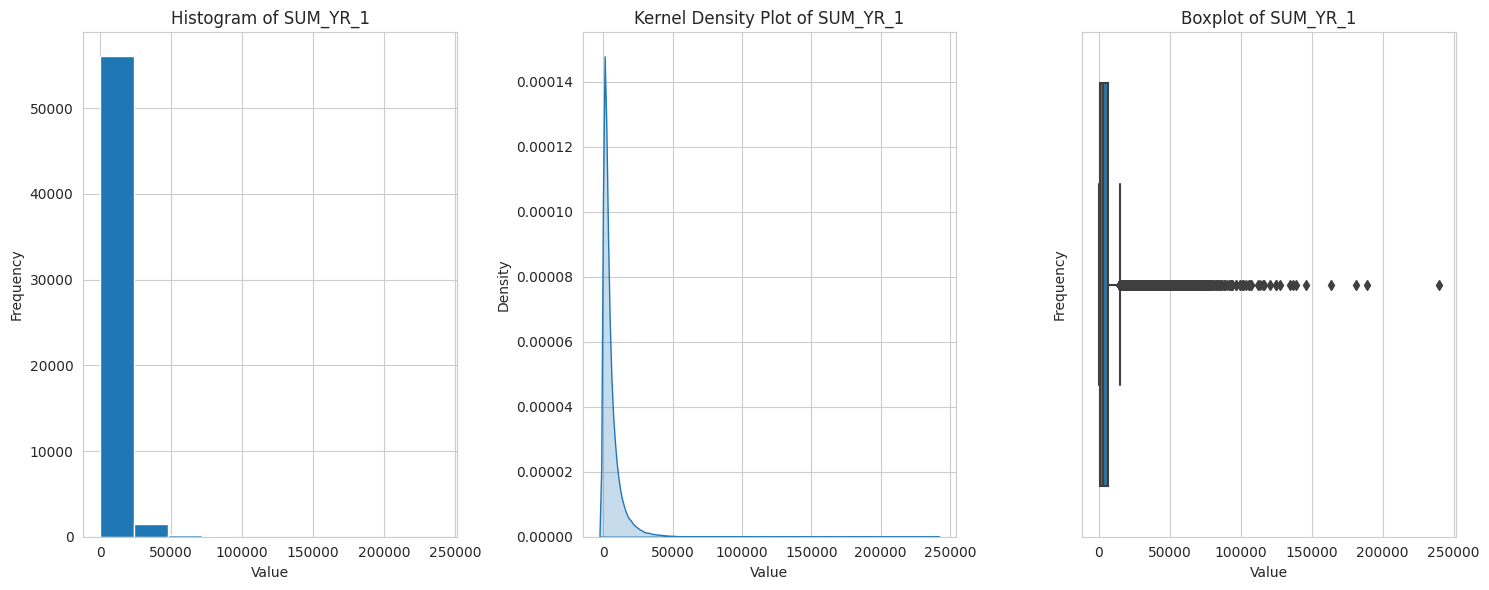

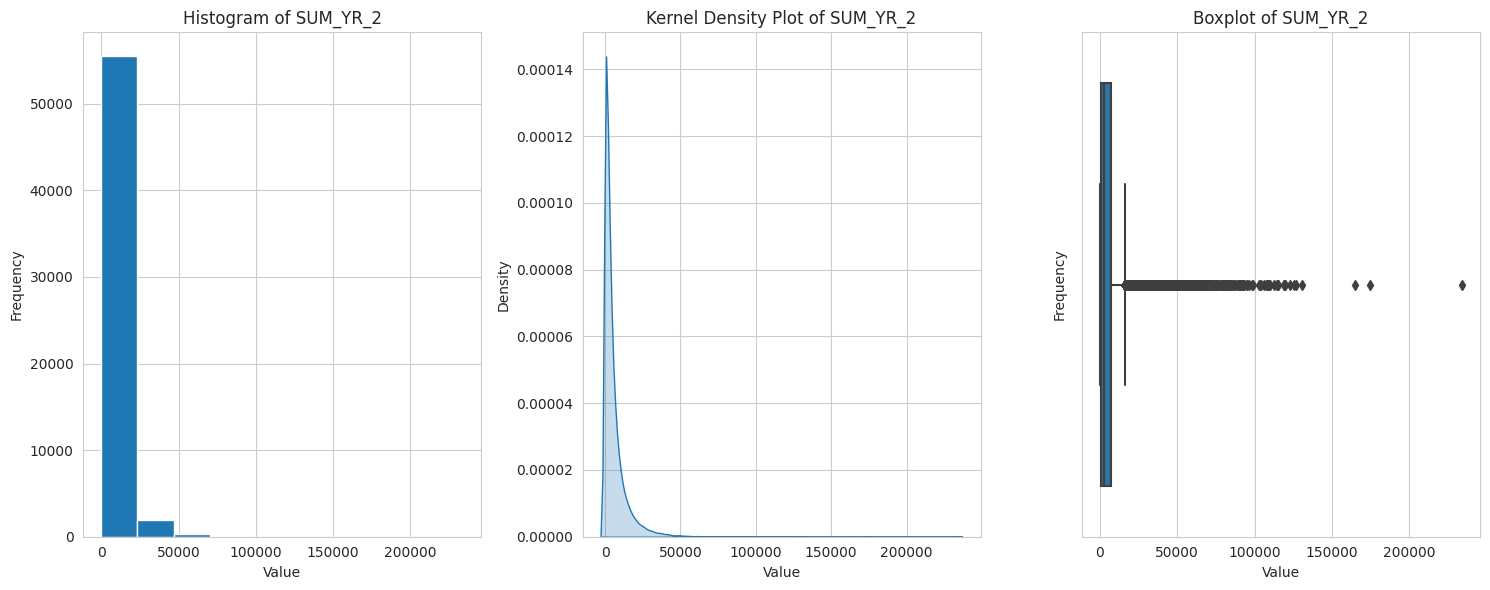

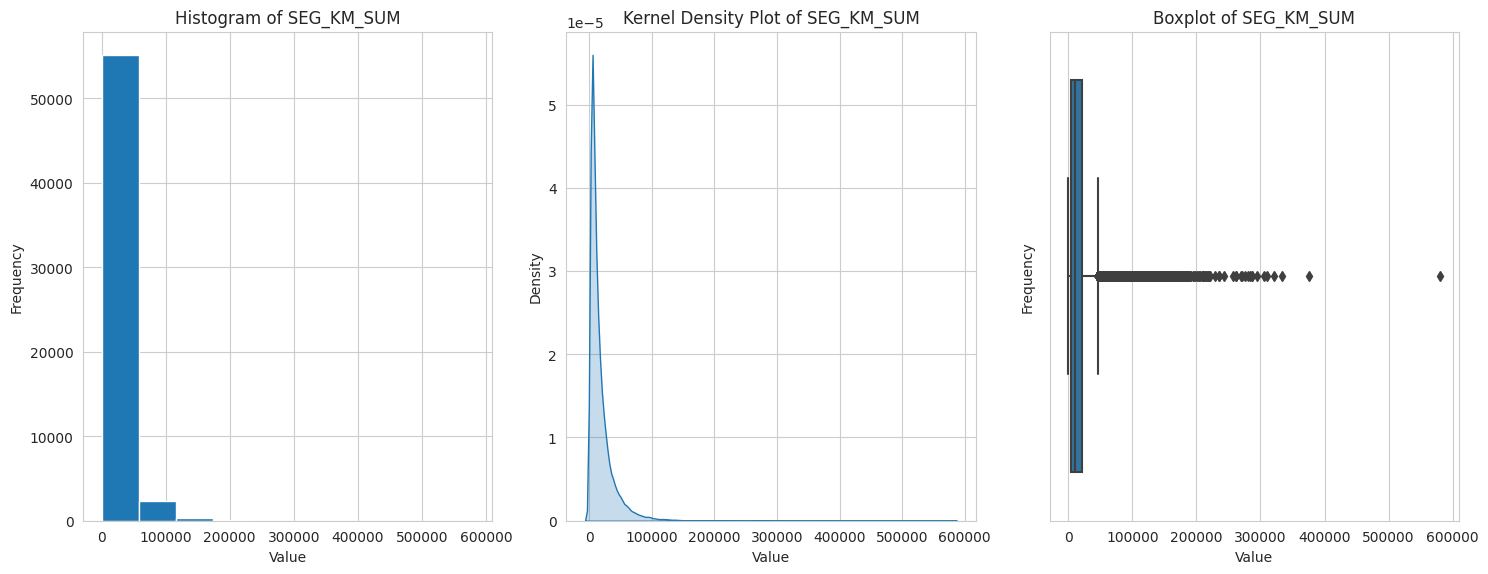

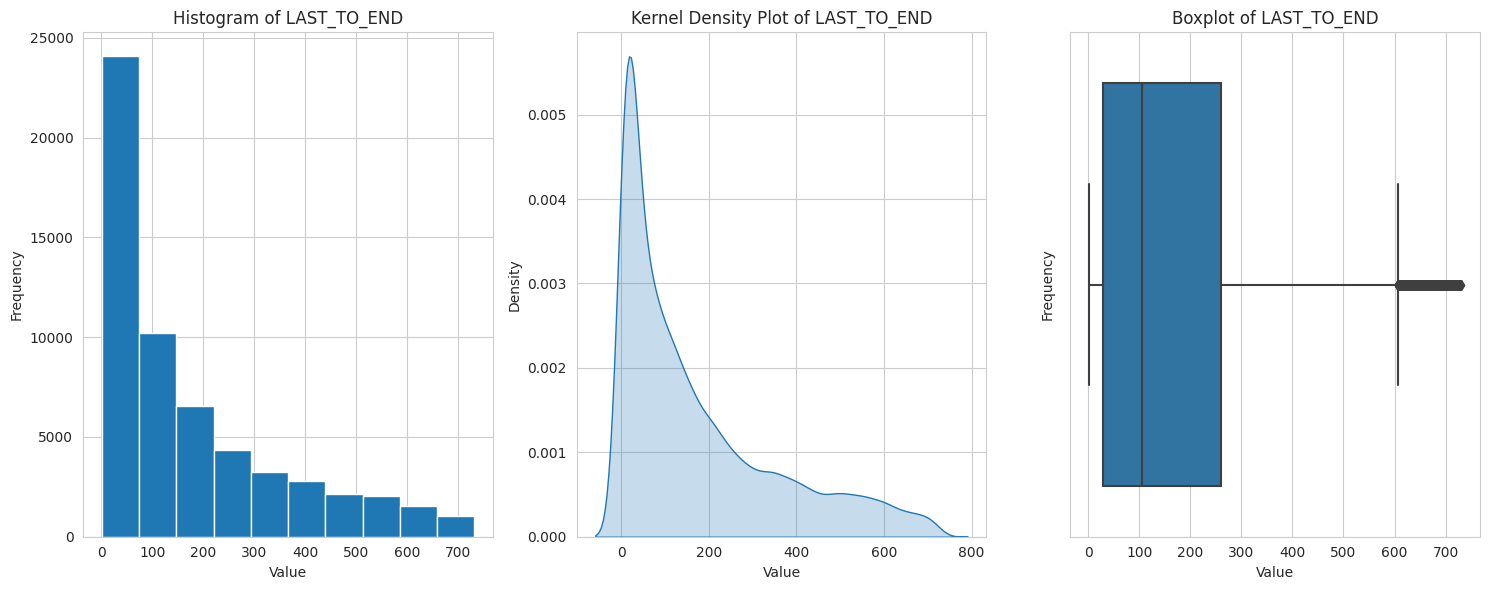

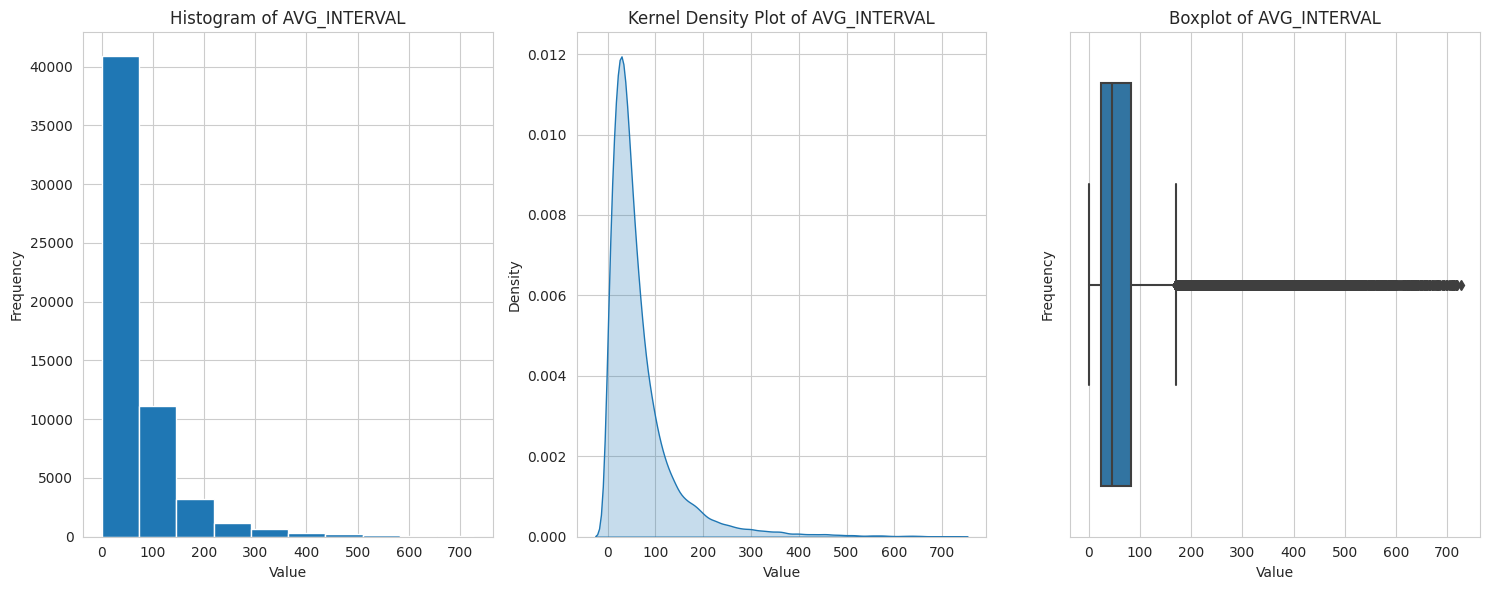

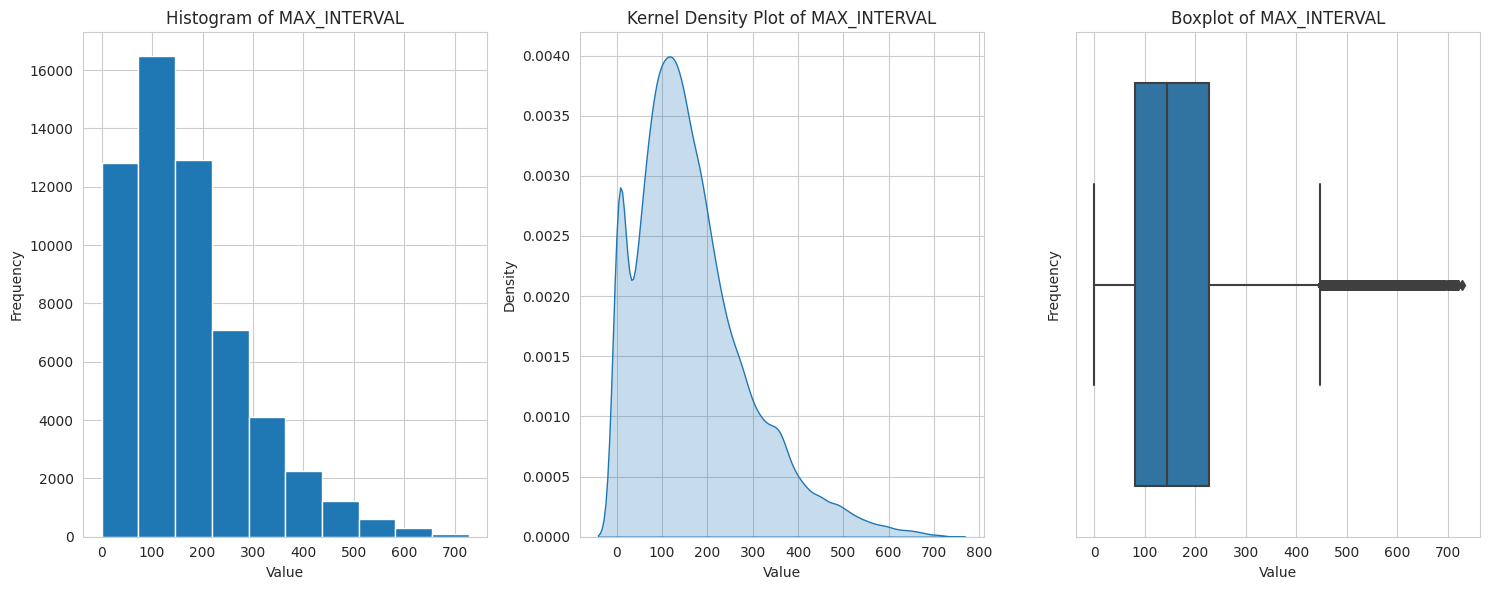

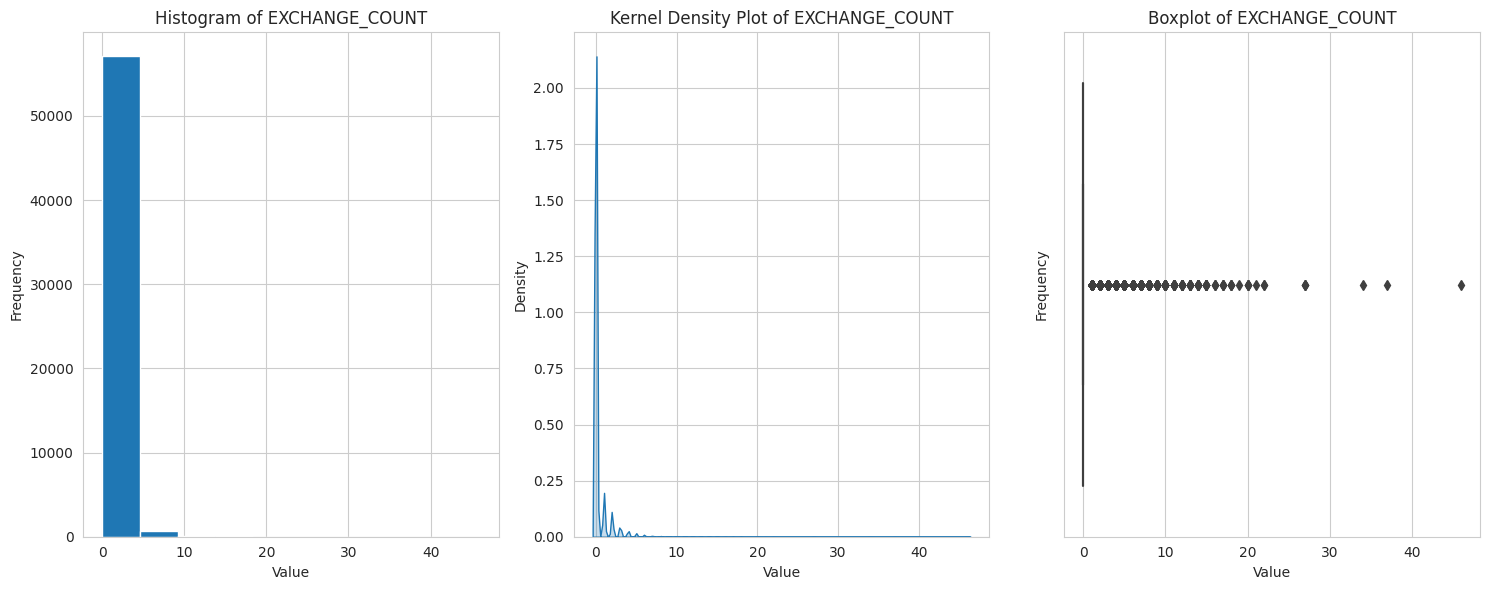

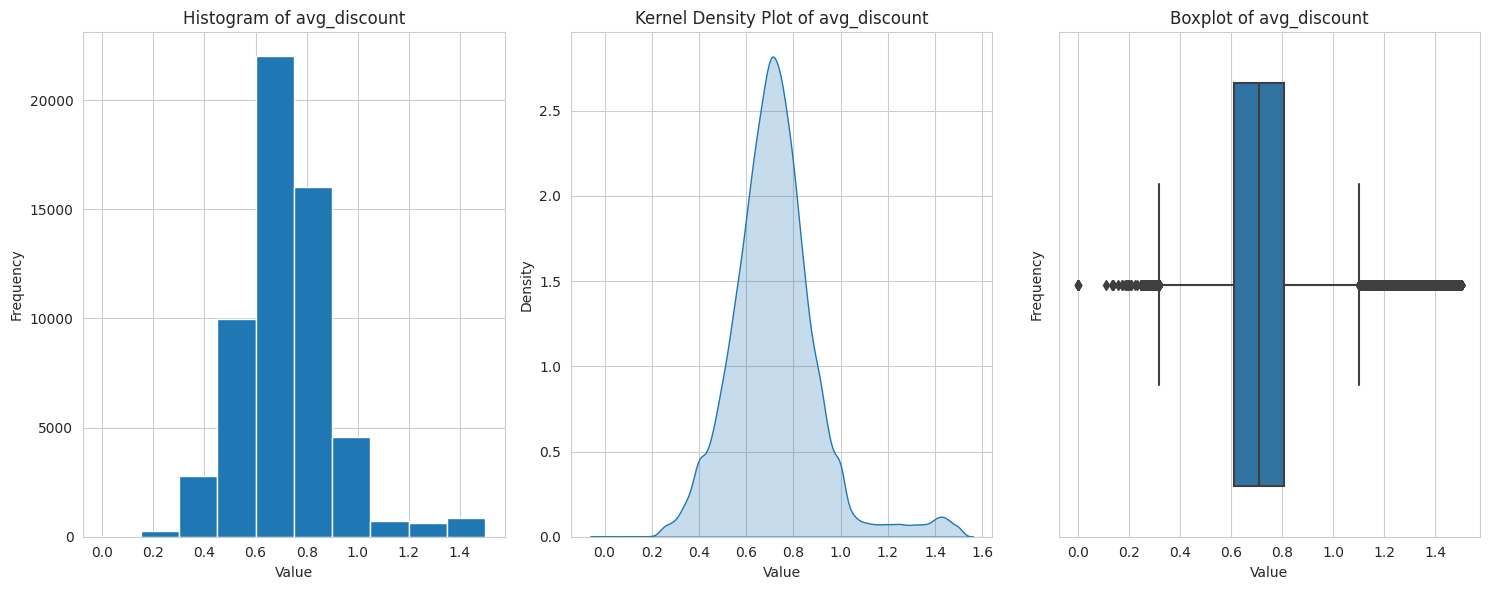

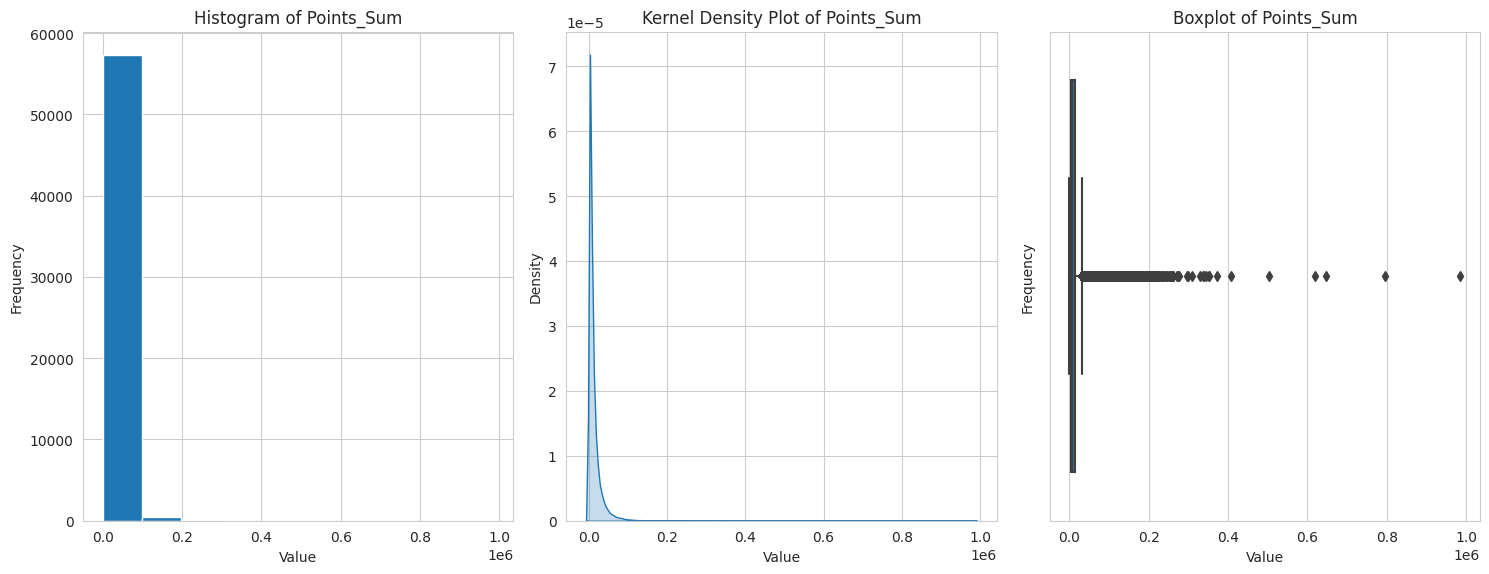

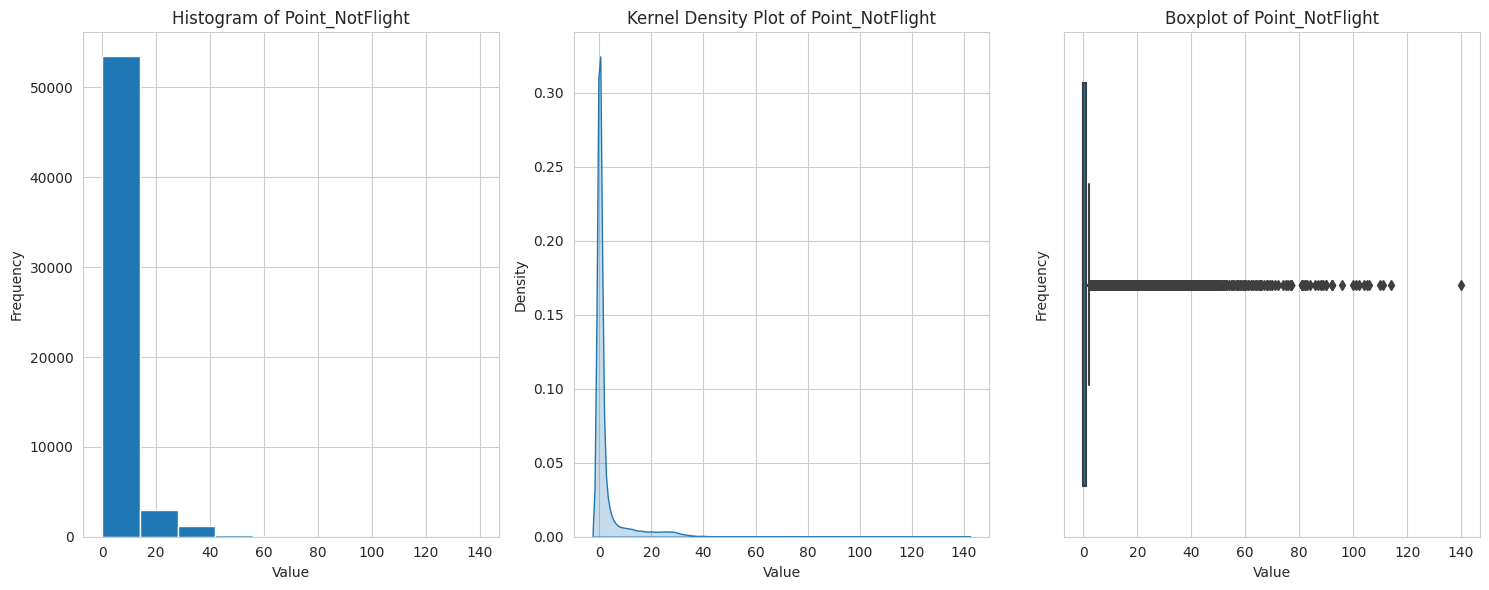

In [20]:
df_num = df.drop(columns=['MEMBER_NO', 'GENDER', 'WORK_CITY',	'WORK_PROVINCE',	'WORK_COUNTRY', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE'])

# Assuming your DataFrame is named 'df'
for col in df_num.columns:
    # Create a figure with three subplots
    fig, ax = plt.subplots(1, 3, figsize=(15, 6))

    # Histogram
    ax[0].hist(df_num[col], bins=10)
    ax[0].set_xlabel('Value')
    ax[0].set_ylabel('Frequency')
    ax[0].set_title('Histogram of {}'.format(col))

    # Kernel Density Plot
    sns.kdeplot(df_num[col], ax=ax[1], fill = True)
    ax[1].set_xlabel('Value')
    ax[1].set_ylabel('Density')
    ax[1].set_title('Kernel Density Plot of {}'.format(col))

    # Boxplot
    sns.boxplot(x = df_num[col], ax=ax[2])
    ax[2].set_xlabel('Value')
    ax[2].set_ylabel('Frequency')
    ax[2].set_title('Boxplot of {}'.format(col))

    # Show the plots
    plt.tight_layout()
    plt.show()

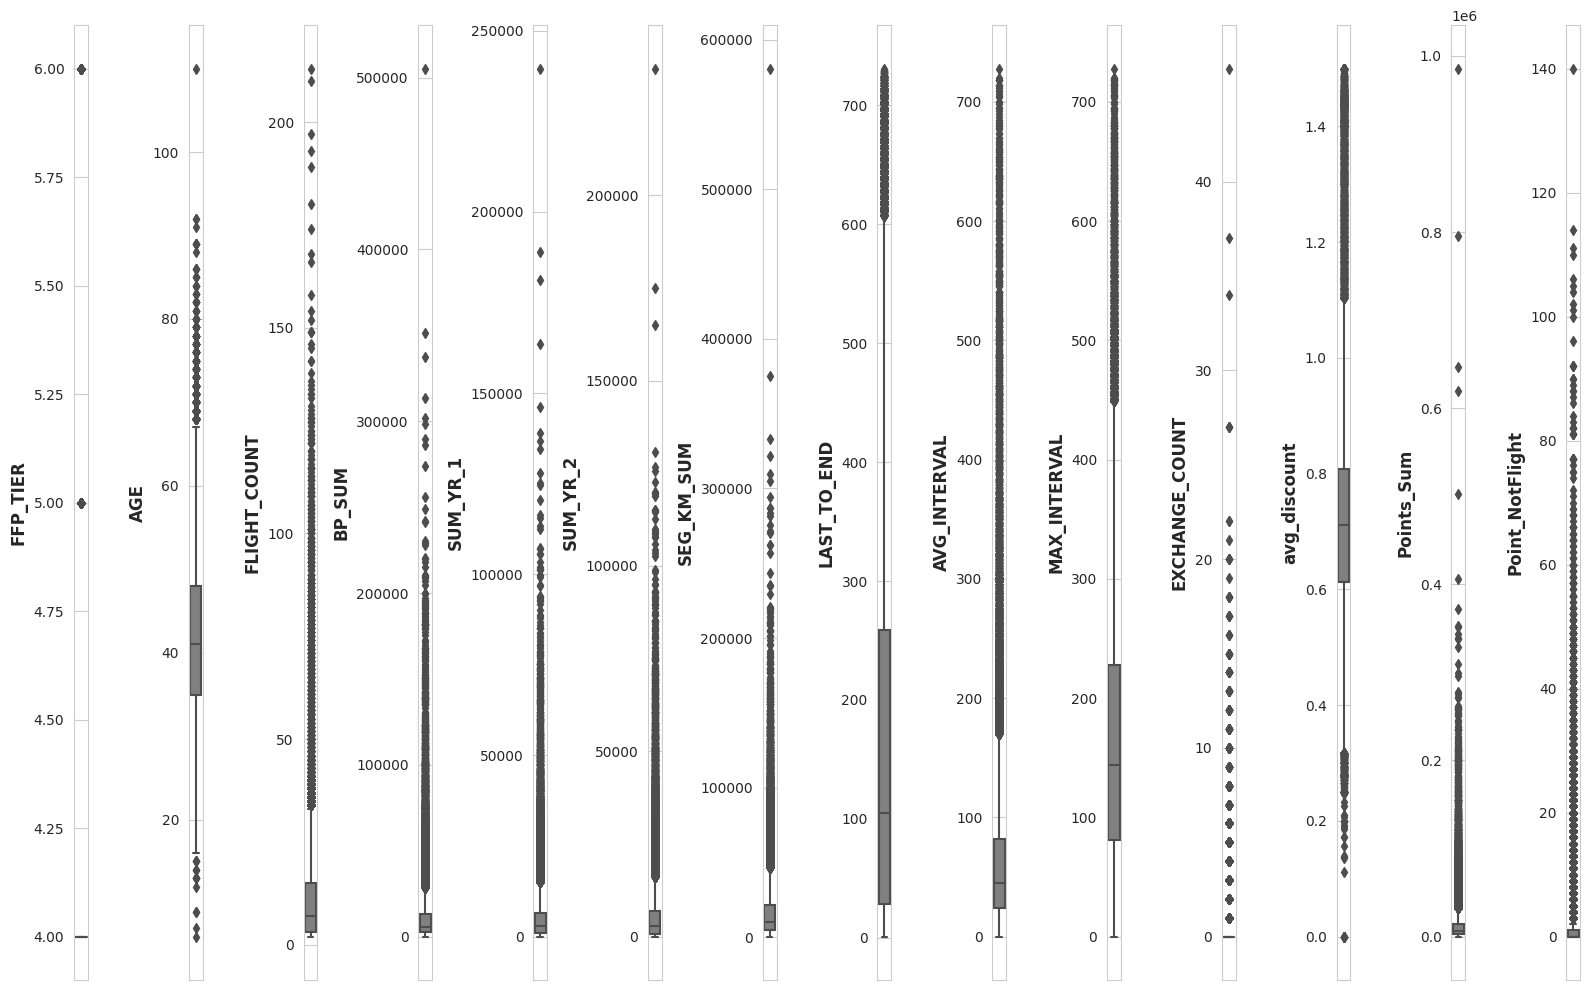

In [21]:
numericals = df_num.columns.to_list()

fig = plt.figure(figsize=(16, 10))

# create a set of boxplots
for i in range(0, len(numericals)):
    ax = plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='gray', orient='v', ax=ax)
    ax.set_ylabel(numericals[i], fontdict={'fontsize': 12, 'fontweight': 'bold'})

plt.tight_layout()
plt.show()

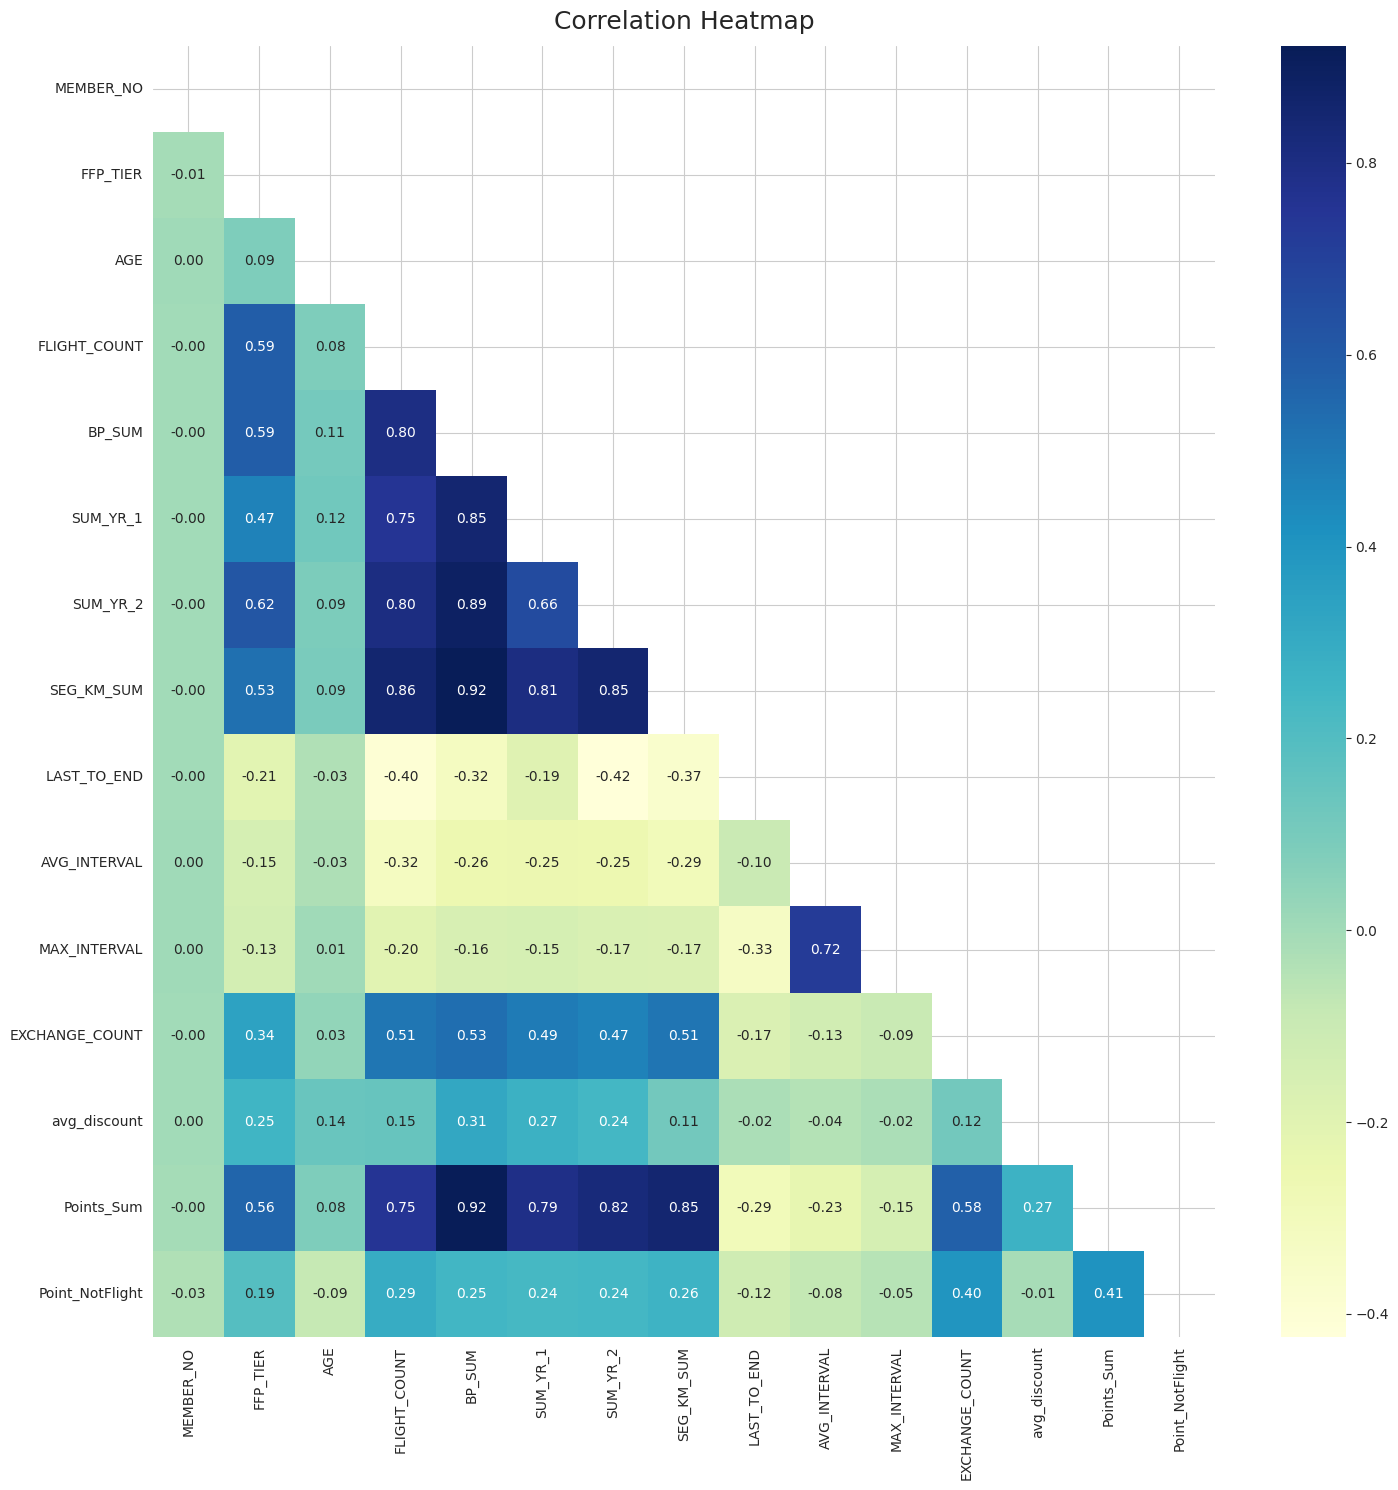

In [22]:
plt.figure(figsize=(15, 15))

p = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(p, dtype=bool))
heatmap = sns.heatmap(p, cmap='YlGnBu', mask=mask, annot=True, fmt='.2f')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()
plt.show()

In [23]:
# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set the threshold for feature selection
threshold = 0.7

# Create a mask to filter out highly correlated features
mask = (corr_matrix.abs() >= threshold) & (corr_matrix != 1)

# Get the names of the highly correlated features
highly_correlated = set()
for col in mask.columns:
    correlated_cols = mask.index[mask[col]].tolist()
    if correlated_cols:
        correlated_cols.append(col)
        highly_correlated.add(tuple(sorted(correlated_cols)))

# Print the highly correlated features
print('Highly correlated features:')
for cols in highly_correlated:
    print('- {}'.format(', '.join(cols)))


Highly correlated features:
- BP_SUM, FLIGHT_COUNT, Points_Sum, SEG_KM_SUM, SUM_YR_1, SUM_YR_2
- BP_SUM, FLIGHT_COUNT, Points_Sum, SEG_KM_SUM, SUM_YR_1
- AVG_INTERVAL, MAX_INTERVAL
- BP_SUM, FLIGHT_COUNT, Points_Sum, SEG_KM_SUM, SUM_YR_2


The following are the possible redundant features:
- SUM_YR_2: because it is highly correlated with BP_SUM, FLIGHT_COUNT, Points_Sum, and SEG_KM_SUM, and also has high correlation with SUM_YR_1 which is also correlated with the same features.
- MAX_INTERVAL: because it is highly correlated with AVG_INTERVAL, and they both represent the same concept of time intervals.
- SUM_YR_1: because it is highly correlated with BP_SUM, FLIGHT_COUNT, Points_Sum, and SEG_KM_SUM, and also has high correlation with SUM_YR_2 which is also correlated with the same features.

<Figure size 1500x1500 with 0 Axes>

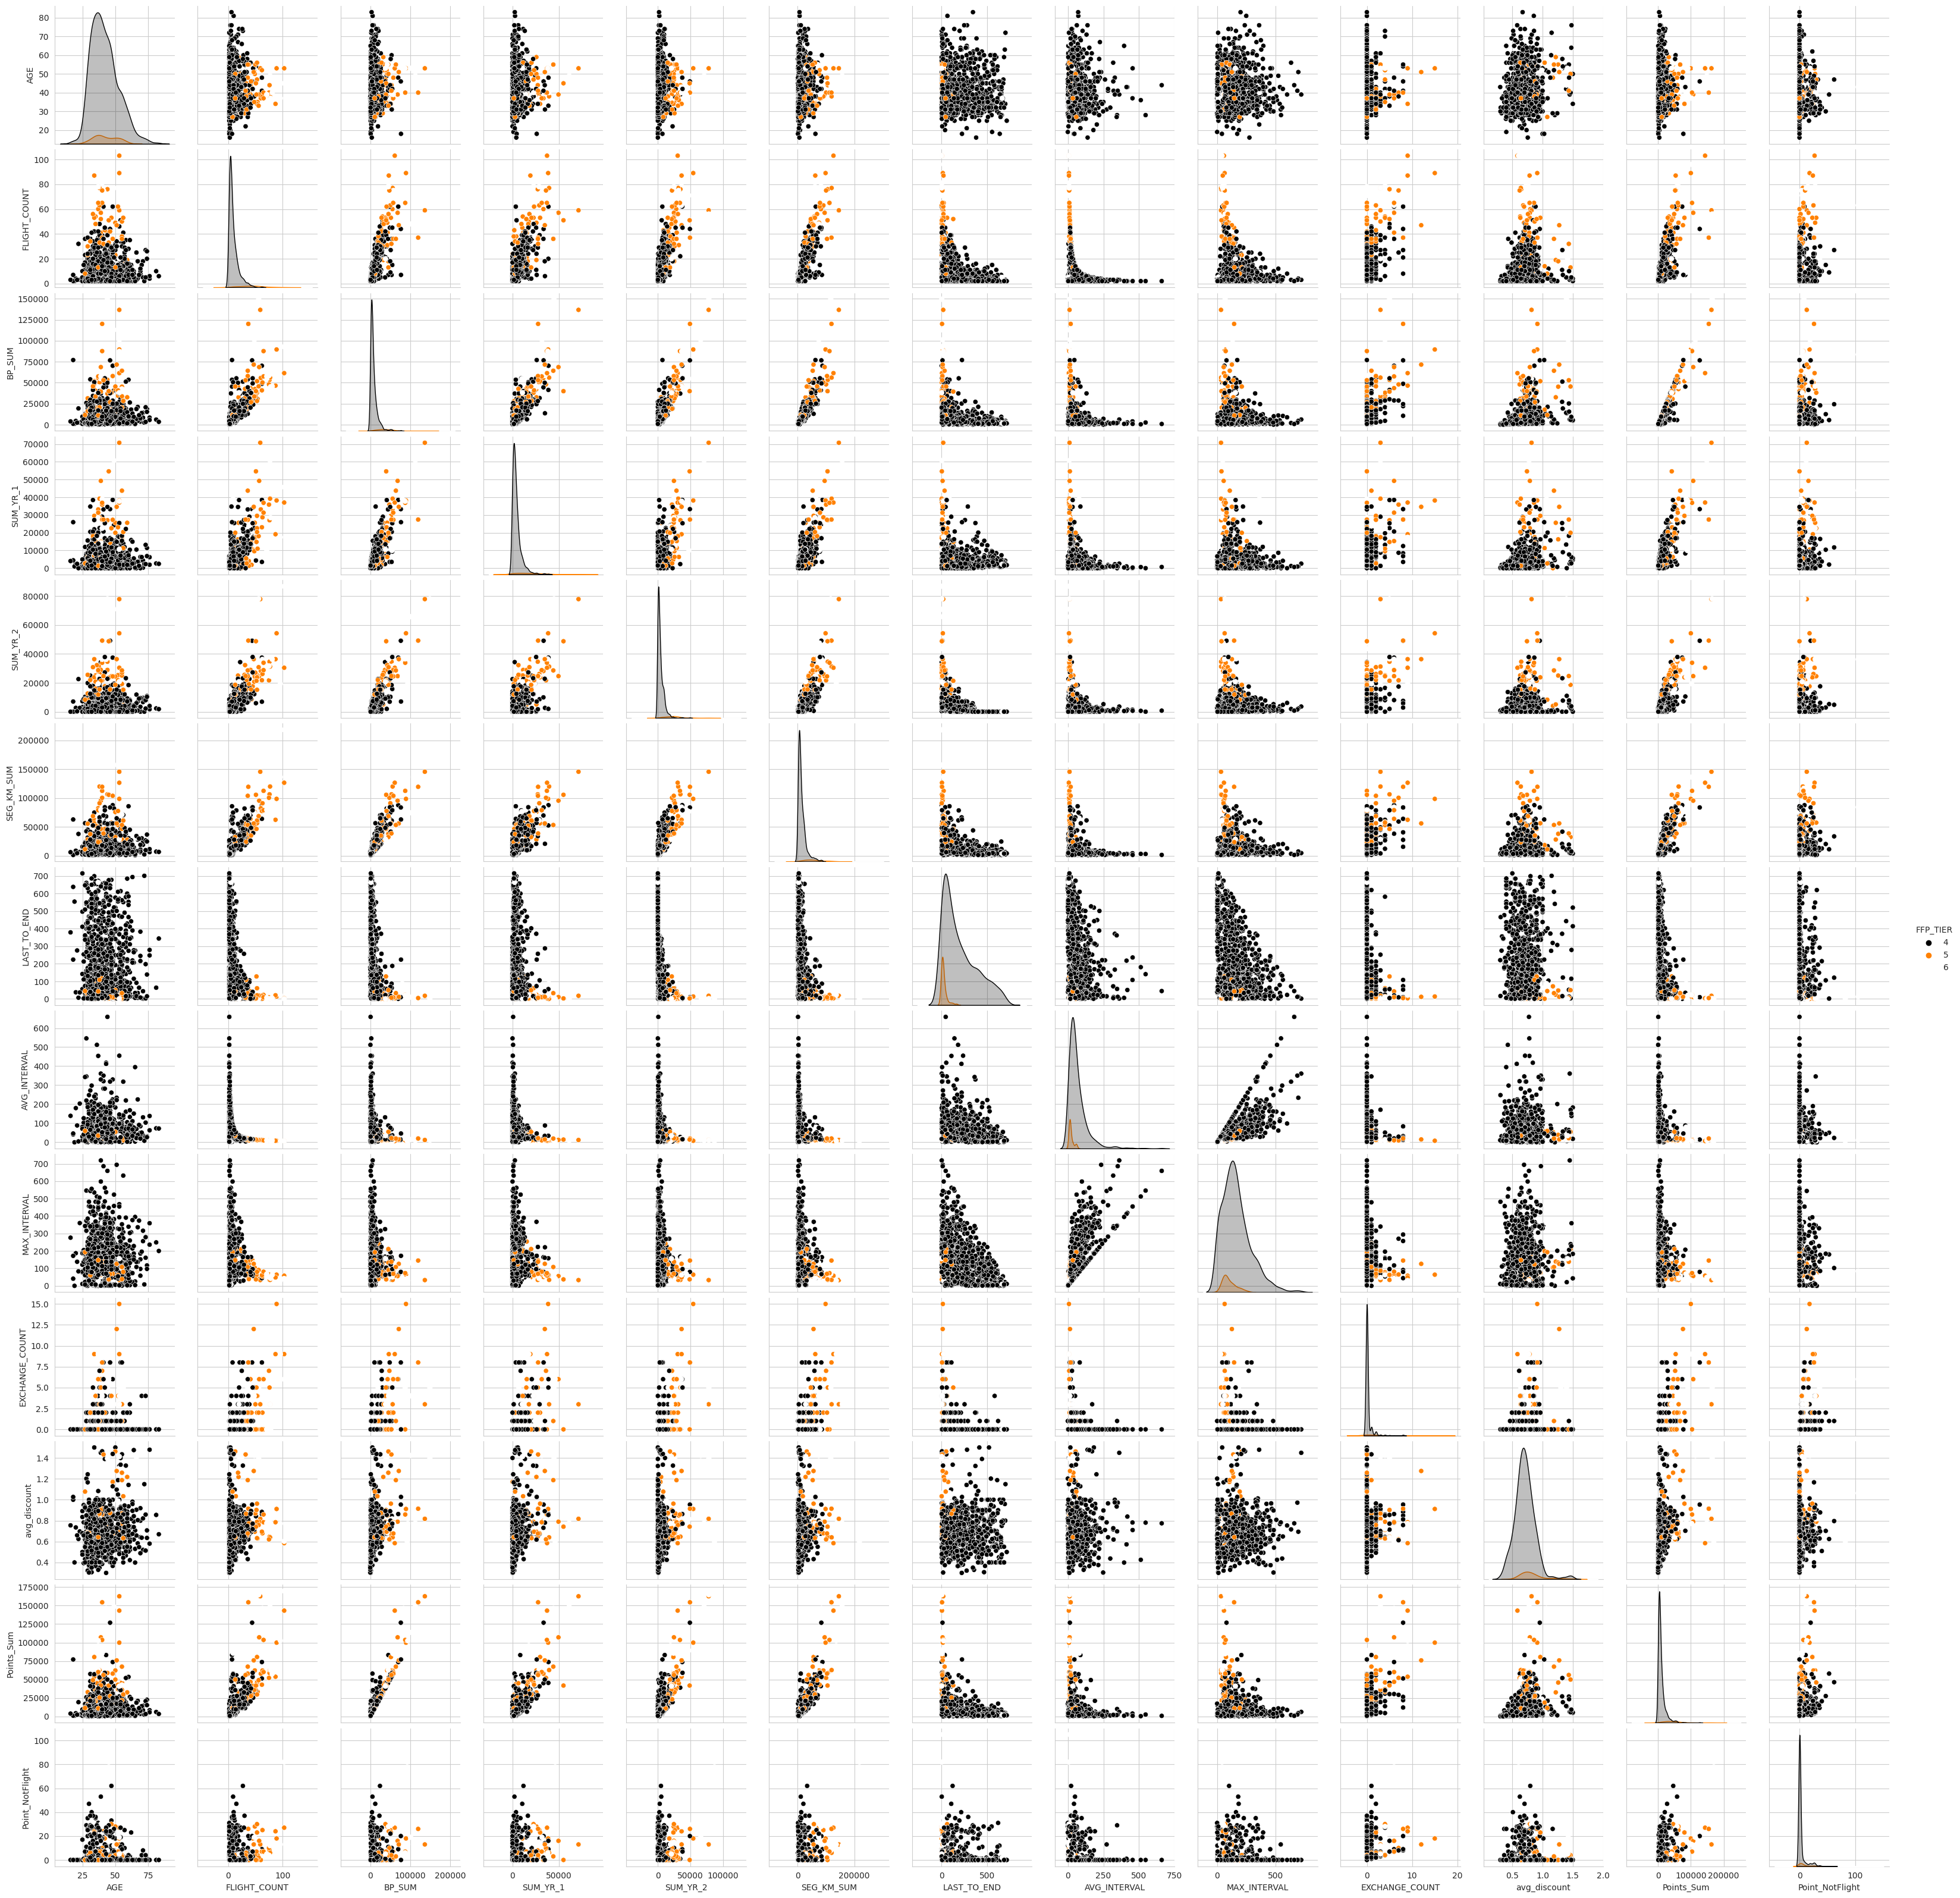

In [24]:
q = df_num.sample(1000, random_state=0)

plt.figure(figsize=(15, 15))
sns.pairplot(q, diag_kind='kde', hue='FFP_TIER', palette='afmhot')

## Some useful insight

Notes:

1. Frequent Flyer Program (FFP) Tier: It appears that members in higher FFP tiers tend to take more flights, as they likely receive more benefits and rewards from the airline. The data could be analyzed to see if there is a significant difference in flight counts between different FFP tiers.

2. Age: The age of the member could also be an important factor in flight count, as older members may have more disposable income and time to travel. Analyzing the data by age group could reveal any patterns in flight counts.

3. Flight Frequency: The dataset contains information on the frequency of flights taken by each member, which could provide insights into the loyalty and engagement of the member. For example, if a member takes a high number of flights but with low frequency, it may indicate that they are not a loyal customer.

4. Work Location: The dataset includes information on the member's work location, which could be analyzed to identify the most common travel destinations for business purposes. This information could be useful for airlines to optimize their routes and services.

5. Points: The dataset contains information on the number of points earned by each member, which could be analyzed to identify any correlation with flight counts or other variables. This could provide insights into the behavior and preferences of members, and could be useful for designing targeted marketing campaigns or loyalty programs.

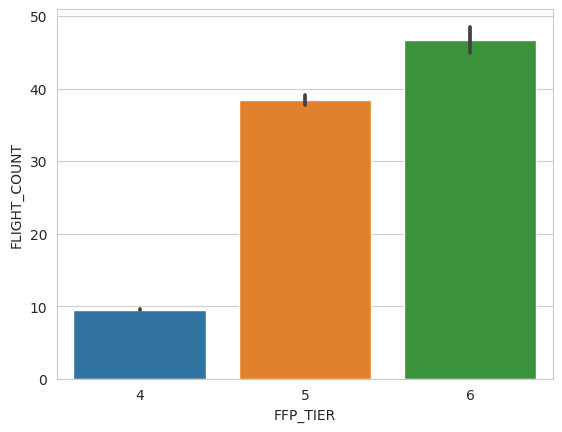

In [25]:
sns.barplot(x='FFP_TIER', y='FLIGHT_COUNT', data=df)

plt.show()

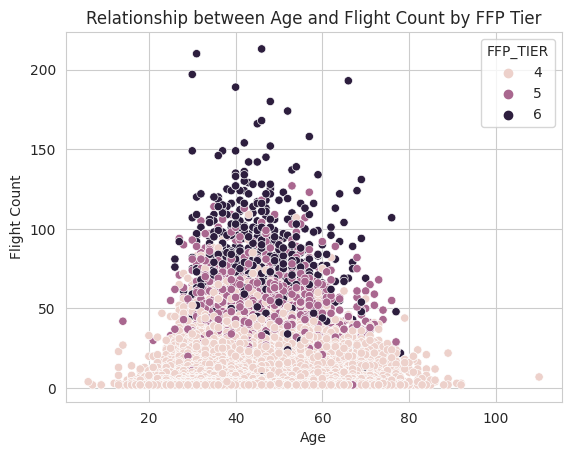

In [26]:
sns.scatterplot(data=df, x='AGE', y='FLIGHT_COUNT', hue='FFP_TIER')
plt.title('Relationship between Age and Flight Count by FFP Tier')
plt.xlabel('Age')
plt.ylabel('Flight Count')
plt.show()

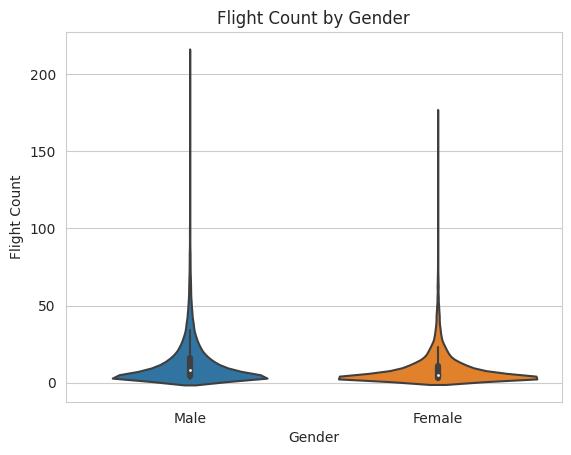

In [27]:
sns.violinplot(x='GENDER', y='FLIGHT_COUNT', data=df)
plt.title('Flight Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Flight Count')
plt.show()

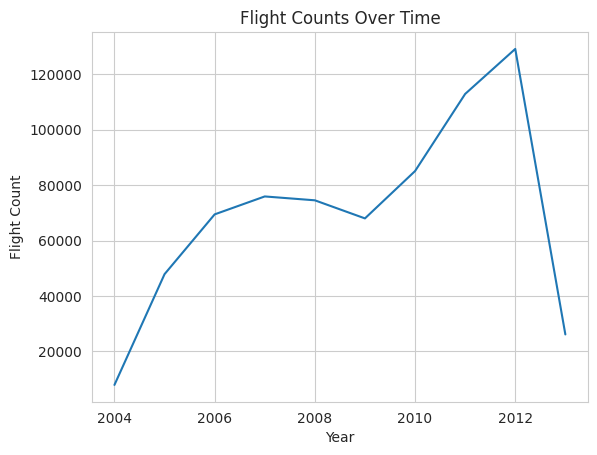

In [28]:
# assuming flight dates are stored in a column named "FLIGHT_DATE"
df['year'] = pd.DatetimeIndex(df['FFP_DATE']).year

# group data by year and sum the flight counts
flight_counts_by_year = df.groupby('year')['FLIGHT_COUNT'].sum()

# create a line chart of flight counts over time
plt.plot(flight_counts_by_year.index, flight_counts_by_year.values)
plt.title('Flight Counts Over Time')
plt.xlabel('Year')
plt.ylabel('Flight Count')
plt.show()


What is the average number of flights taken by members in the dataset?

In [29]:
avg_flights = df['FLIGHT_COUNT'].mean()
print("The average number of flights taken by members in the dataset is:", round(avg_flights, 2))

The average number of flights taken by members in the dataset is: 12.04


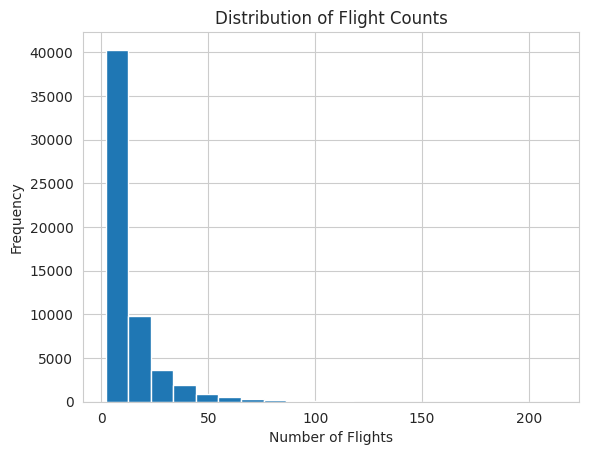

In [30]:
plt.hist(df['FLIGHT_COUNT'], bins=20)
plt.title("Distribution of Flight Counts")
plt.xlabel("Number of Flights")
plt.ylabel("Frequency")
plt.show()

What is the distribution of membership tiers among members in the dataset?

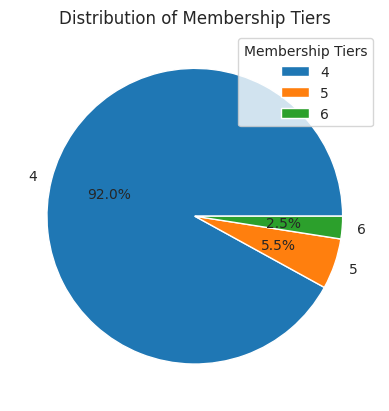

In [31]:
tier_counts = df['FFP_TIER'].value_counts()

plt.pie(tier_counts, labels=tier_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Membership Tiers")
plt.legend(title="Membership Tiers", loc="best")
plt.show()

What is the average age of members in the dataset? How does this vary by membership tier?

In [32]:
avg_age = df['AGE'].mean()
print("The average age of members in the dataset is:", round(avg_age, 2))

The average age of members in the dataset is: 42.23


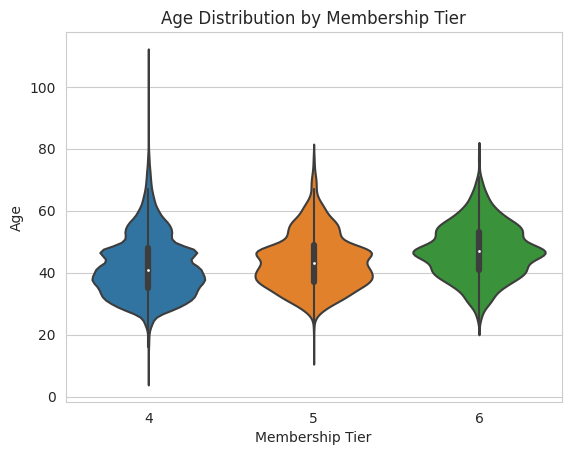

In [33]:
sns.violinplot(x='FFP_TIER', y='AGE', data=df)
plt.title("Age Distribution by Membership Tier")
plt.xlabel("Membership Tier")
plt.ylabel("Age")
plt.show()

What is the average amount of money spent by members on flights (BP_SUM) in the dataset?

In [34]:
avg_spending = df['BP_SUM'].mean()
print("The average amount spent on flights by members in the dataset is:", round(avg_spending, 2))

The average amount spent on flights by members in the dataset is: 11047.84


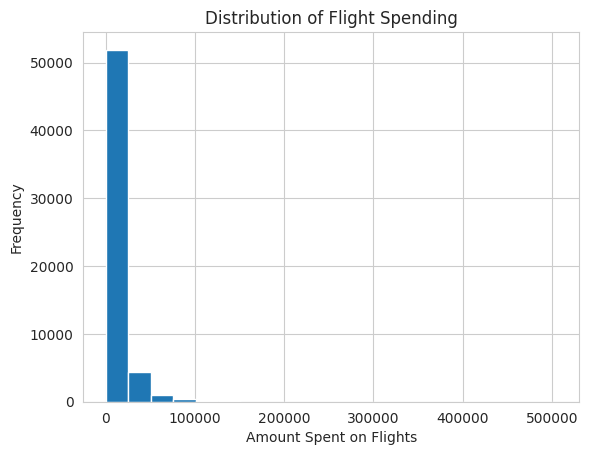

In [35]:
plt.hist(df['BP_SUM'], bins=20)
plt.title("Distribution of Flight Spending")
plt.xlabel("Amount Spent on Flights")
plt.ylabel("Frequency")
plt.show()

What is the distribution of flight distances (SEG_KM_SUM) among members in the dataset?

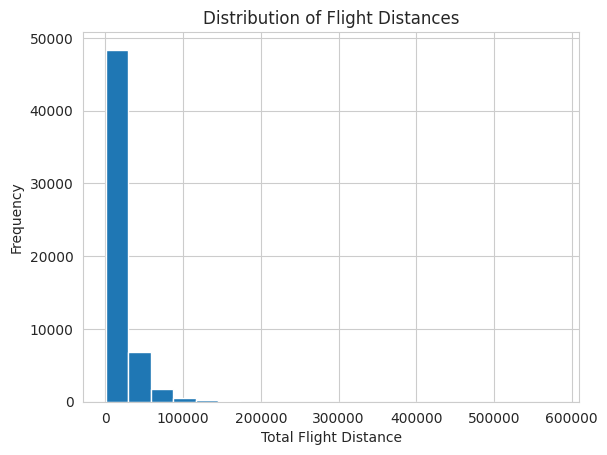

In [36]:
plt.hist(df['SEG_KM_SUM'], bins=20)
plt.title("Distribution of Flight Distances")
plt.xlabel("Total Flight Distance")
plt.ylabel("Frequency")
plt.show()

## Statistic

In [37]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57860 entries, 0 to 62986
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FFP_TIER         57860 non-null  int64  
 1   AGE              57860 non-null  float64
 2   FLIGHT_COUNT     57860 non-null  int64  
 3   BP_SUM           57860 non-null  int64  
 4   SUM_YR_1         57860 non-null  float64
 5   SUM_YR_2         57860 non-null  float64
 6   SEG_KM_SUM       57860 non-null  int64  
 7   LAST_TO_END      57860 non-null  int64  
 8   AVG_INTERVAL     57860 non-null  float64
 9   MAX_INTERVAL     57860 non-null  int64  
 10  EXCHANGE_COUNT   57860 non-null  int64  
 11  avg_discount     57860 non-null  float64
 12  Points_Sum       57860 non-null  int64  
 13  Point_NotFlight  57860 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 6.6 MB


In [38]:
# separate the target variable from the features
X = df_num.drop(columns=['FFP_TIER'])
y = df['FFP_TIER']

# perform ANOVA for each feature
f_scores = []
p_values = []
for col in X.columns:
    groups = []
    for target_value in np.unique(y):
        groups.append(X.loc[y==target_value, col])
    f, p = f_oneway(*groups)
    f_scores.append(f)
    p_values.append(p)
anova_results = pd.DataFrame({'Feature': X.columns, 'F-score': f_scores, 'P-value': p_values})

# perform Chi-square test for each feature
chi2_scores = []
p_values = []
for col in X.columns:
    contingency_table = pd.crosstab(X[col], y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_scores.append(chi2)
    p_values.append(p)
chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi2-score': chi2_scores, 'P-value': p_values})

# print the results
print("\nANOVA results:")
print(anova_results)
print("\nChi-square test results:")
print(chi2_results)


ANOVA results:
            Feature       F-score        P-value
0               AGE    223.229705   2.658949e-97
1      FLIGHT_COUNT  16637.165341   0.000000e+00
2            BP_SUM  15324.621028   0.000000e+00
3          SUM_YR_1   8118.315676   0.000000e+00
4          SUM_YR_2  18095.259648   0.000000e+00
5        SEG_KM_SUM  11763.757071   0.000000e+00
6       LAST_TO_END   1562.710064   0.000000e+00
7      AVG_INTERVAL    766.972959   0.000000e+00
8      MAX_INTERVAL    595.349078  1.168919e-256
9    EXCHANGE_COUNT   3896.666483   0.000000e+00
10     avg_discount   1965.549031   0.000000e+00
11       Points_Sum  13342.461672   0.000000e+00
12  Point_NotFlight   1134.038875   0.000000e+00

Chi-square test results:
            Feature     Chi2-score        P-value
0               AGE     789.845726   1.382919e-82
1      FLIGHT_COUNT   30317.428605   0.000000e+00
2            BP_SUM   95863.049915   0.000000e+00
3          SUM_YR_1   73393.094937   0.000000e+00
4          SUM_YR_2   

In [39]:
anova_p_values = anova_results['P-value']
chi2_p_values = chi2_results['P-value']

if all(anova_p_values < 0.05) and all(chi2_p_values < 0.05):
    print("All features are significant")
else:
    print("The following features are not significant:")
    if any(anova_p_values >= 0.05):
        print(anova_results.loc[anova_p_values >= 0.05, 'Feature'])
    if any(chi2_p_values >= 0.05):
        print(chi2_results.loc[chi2_p_values >= 0.05, 'Feature'])

All features are significant


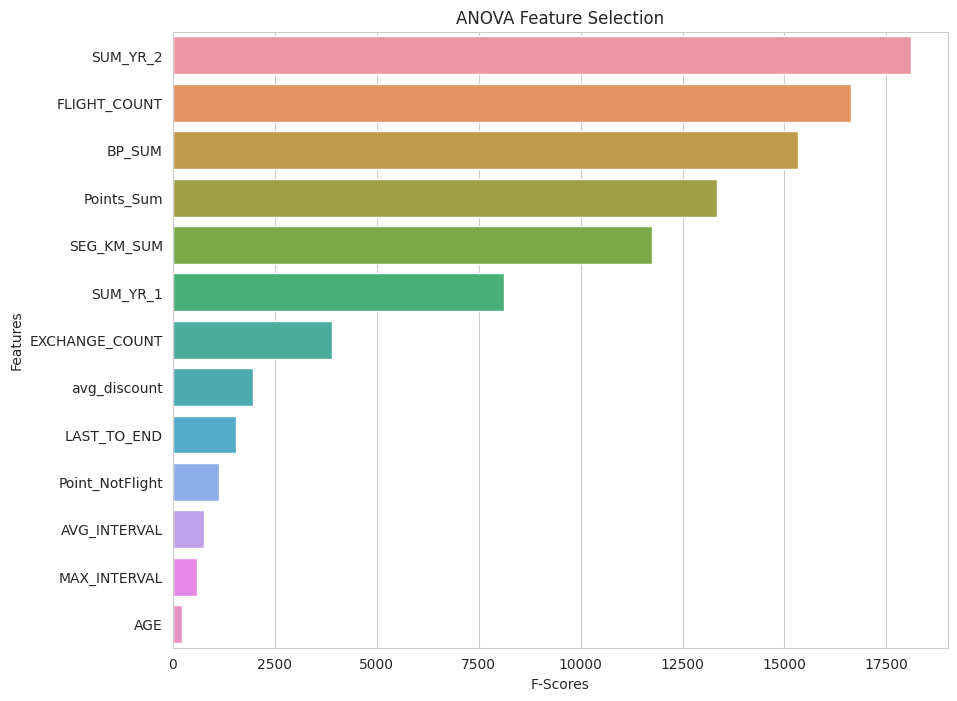

In [40]:
# sort the dataframe by descending f-scores
anova_results = anova_results.sort_values(by='F-score', ascending=False, ignore_index=True)

# create horizontal bar plot for f-scores
plt.figure(figsize=(10, 8))
sns.barplot(x='F-score', y='Feature', data=anova_results, orient='h')
plt.title('ANOVA Feature Selection')
plt.xlabel('F-Scores')
plt.ylabel('Features')
plt.show()

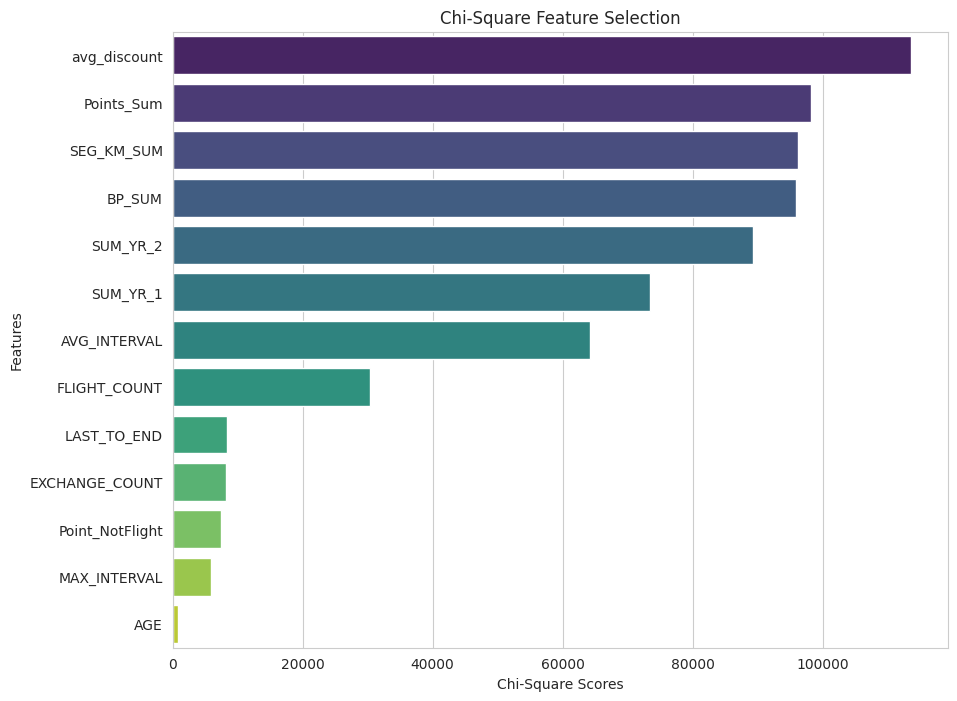

In [41]:
# sort the dataframe by descending chi2_scores
chi2_results = chi2_results.sort_values(by='Chi2-score', ascending=False)

# print the feature scores
chi2_results = chi2_results.reset_index(drop=True)

# create horizontal bar plot for chi-square scores
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Chi2-score', y='Feature', data=chi2_results, palette='viridis')

# set title and labels
ax.set_title('Chi-Square Feature Selection')
ax.set_xlabel('Chi-Square Scores')
ax.set_ylabel('Features')

# show the plot
plt.show()

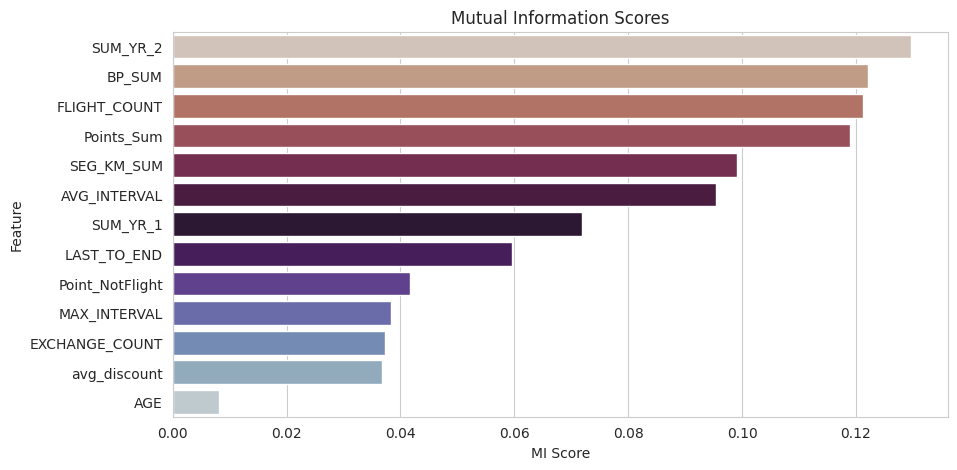

In [42]:
# perform mutual information for each feature
mi_scores = mutual_info_classif(X, y)

# create a DataFrame with feature names and MI scores
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# sort the DataFrame by MI score in ascending order
mi_df = mi_df.sort_values('MI Score', ascending=False)

# plot the horizontal bar chart using Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data=mi_df, x='MI Score', y='Feature', palette='twilight_r')
plt.xlabel('MI Score')
plt.ylabel('Feature')
plt.title('Mutual Information Scores')
plt.show()


In [43]:
# set the MI score threshold
threshold = 0.08

# check if all MI scores are above the threshold
if (mi_df['MI Score'] > threshold).all():
    print("All features have MI scores above the threshold.")
else:
    print("Some features have MI scores below the threshold:")
    print(mi_df[mi_df['MI Score'] <= threshold])

Some features have MI scores below the threshold:
            Feature  MI Score
3          SUM_YR_1  0.071826
6       LAST_TO_END  0.059510
12  Point_NotFlight  0.041707
8      MAX_INTERVAL  0.038294
9    EXCHANGE_COUNT  0.037256
10     avg_discount  0.036683
0               AGE  0.008052


Mutual information (MI) is a measure of the dependence between two variables, in this case, the features and the target variable. The MI score indicates how much information the presence or absence of a certain feature provides about the target variable.

In the context of feature selection, MI can be used to measure the relevance of each feature to the target variable. Features with high MI scores are considered to be more informative and potentially more important for predicting the target variable.

MI scores range from 0 (no information gain) to 1 (perfect information gain). Therefore, a higher MI score indicates a stronger relationship between the feature and the target variable. MI is often used as an alternative to correlation analysis for non-linear relationships between variables.

# Selected features

1. BP_SUM  (Rencana penerbangan):
> Fitur ini penting karena menunjukkan besarnya biaya yang dikeluarkan oleh pelanggan pada rencana perjalanannya. Hal ini dapat digunakan untuk mengidentifikasi pelanggan yang potensial untuk menikmati penawaran atau program pemasaran khusus, berdasarkan jumlah biaya yang mereka keluarkan untuk perjalanan.

2. FLIGHT_COUNT  (Jumlah penerbangan):
> Fitur ini penting karena menunjukkan seberapa sering pelanggan melakukan penerbangan. Hal ini dapat digunakan untuk mengidentifikasi pelanggan yang loyal atau memiliki kebutuhan perjalanan yang tinggi dan mungkin perlu mendapatkan penawaran atau program pemasaran yang khusus.

3. Points_Sum  (Jumlah poin): 
> Fitur ini penting karena menunjukkan seberapa banyak poin yang telah dikumpulkan oleh pelanggan. Hal ini dapat digunakan untuk mengidentifikasi pelanggan yang mungkin lebih tertarik pada program penghargaan atau diskon yang didasarkan pada poin yang dikumpulkan.

4. SEG_KM_SUM  (Total jarak penerbangan): 
> Fitur ini penting karena menunjukkan seberapa jauh pelanggan melakukan perjalanan menggunakan maskapai penerbangan. Hal ini dapat digunakan untuk mengidentifikasi pelanggan yang sering melakukan perjalanan jarak jauh dan mungkin membutuhkan layanan khusus atau penawaran diskon.

5. SUM_YR_2 (Votes Prices): 
> Fitur ini penting karena menunjukkan besarnya pengeluaran pelanggan pada maskapai penerbangan selama dua tahun terakhir. Hal ini dapat digunakan untuk mengidentifikasi pelanggan yang cenderung menggunakan maskapai penerbangan dan mungkin membutuhkan program pemasaran atau penawaran yang khusus.

In [44]:
df_cl = df[['BP_SUM', 'FLIGHT_COUNT', 'Points_Sum', 'SEG_KM_SUM', 'SUM_YR_2']]

df_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57860 entries, 0 to 62986
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BP_SUM        57860 non-null  int64  
 1   FLIGHT_COUNT  57860 non-null  int64  
 2   Points_Sum    57860 non-null  int64  
 3   SEG_KM_SUM    57860 non-null  int64  
 4   SUM_YR_2      57860 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 2.6 MB


## Unsupervised Learning: Clustering

Melakukan standarisasi data

In [45]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cl)

Menentukan jumlah cluster yang optimal dengan metode elbow

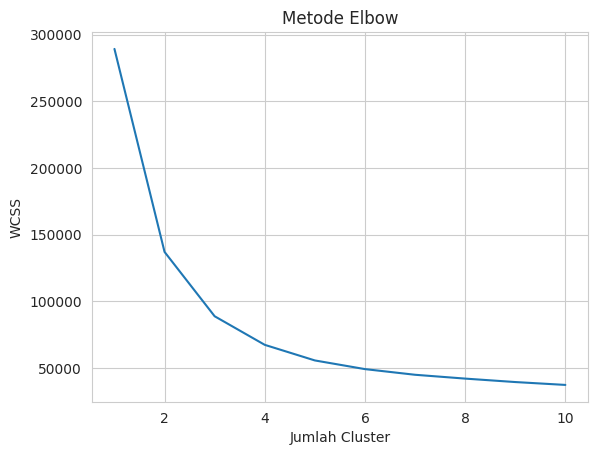

In [46]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=50, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

Melakukan clustering K-means dengan jumlah cluster yang optimal

In [47]:
n_clusters = 3 # Ubah sesuai jumlah cluster yang dianggap optimal
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=50, random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=50, random_state=42)

Menambahkan kolom hasil clustering ke dalam data frame

In [48]:
df_cl['cluster'] = kmeans.labels_

<ipython-input-48-3a293d3ff542>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl['cluster'] = kmeans.labels_


Melakukan visualisasi hasil clustering dengan scatter plot

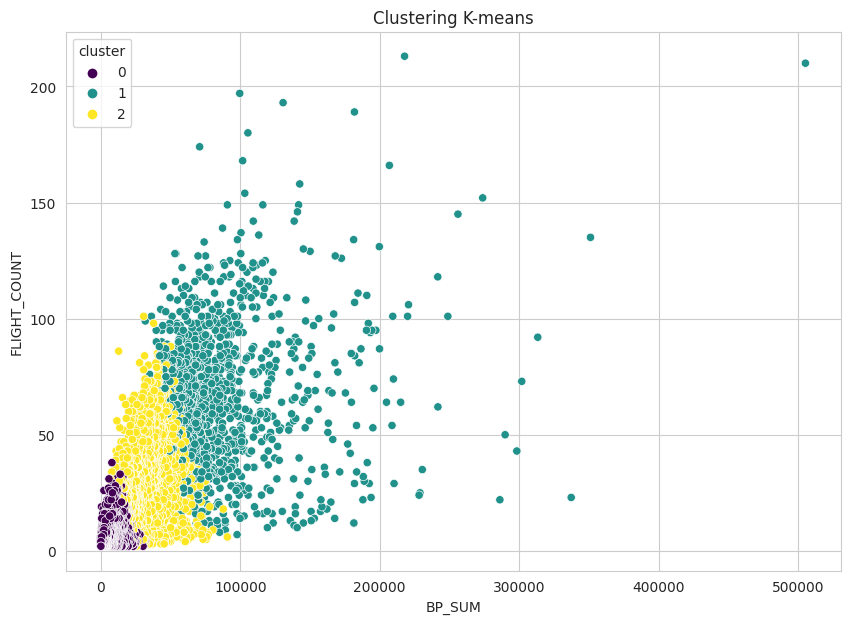

In [49]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_cl.iloc[:, 0], y=df_cl.iloc[:, 1], hue=df_cl['cluster'], palette='viridis')
plt.xlabel('BP_SUM')
plt.ylabel('FLIGHT_COUNT')
plt.title('Clustering K-means')
plt.show()

Menghitung silhouette score untuk mengevaluasi kualitas clustering

In [50]:
silhouette_avg = silhouette_score(df_scaled, df_cl['cluster'])
print('Silhouette Score:', silhouette_avg)


Silhouette Score: 0.6406864342078876


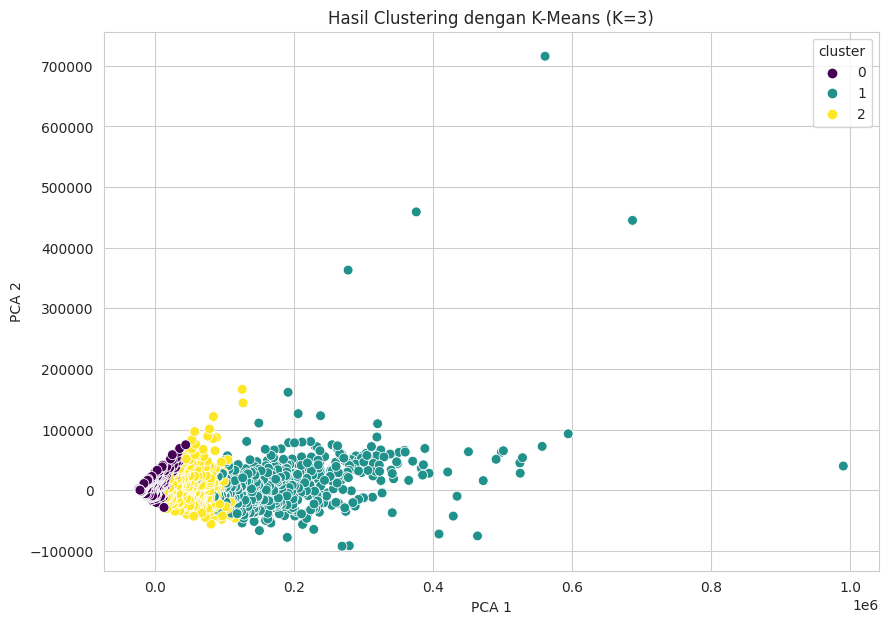

In [51]:
# Melakukan PCA dengan 2 komponen
pca = PCA(n_components=2)
pca.fit(df_cl)
X_pca = pca.transform(df_cl)

# Plot hasil clustering dengan PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cl['cluster'], palette='viridis', s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Hasil Clustering dengan K-Means (K=3)')
plt.show()

## Bussines Recomendation

In [52]:
df_clustered = df_cl.copy()
df_clustered['cluster'] = df_cl['cluster']

cluster_stats = df_clustered.groupby('cluster').describe()
print(cluster_stats)

          BP_SUM                                                         \
           count          mean           std     min       25%      50%   
cluster                                                                   
0        46346.0   5505.154080   4303.287472     0.0   2131.00   4257.5   
1         1372.0  83230.378280  40799.019407   634.0  58380.25  71383.0   
2        10142.0  26611.544863  10842.541663  1358.0  18521.00  23944.0   

                            FLIGHT_COUNT             ... SEG_KM_SUM            \
              75%       max        count       mean  ...        75%       max   
cluster                                              ...                        
0         7931.50   34660.0      46346.0   6.842640  ...   13639.75   50758.0   
1        93381.25  505308.0       1372.0  66.180029  ...  119287.75  580717.0   
2        32633.75   90726.0      10142.0  28.483534  ...   49286.25  126699.0   

        SUM_YR_2                                              

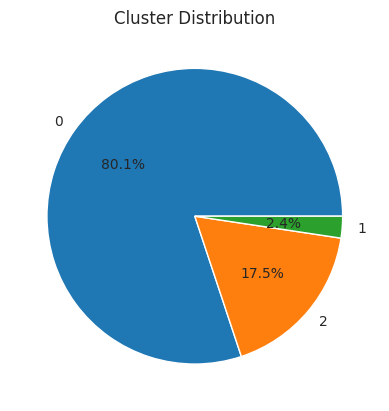

In [53]:
cluster_counts = df_cl['cluster'].value_counts()

# create a pie chart
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%')
plt.title('Cluster Distribution')
plt.show()

Setiap cluster memiliki jumlah observasi yang berbeda-beda, dengan cluster 1 memiliki observasi terbanyak sebanyak 46.554 dan cluster 0 memiliki observasi terkecil sebanyak 1.310.

Berdasarkan nilai mean dan std, dapat dilihat bahwa fitur-fitur pada setiap cluster memiliki nilai yang berbeda-beda, yang menunjukkan perbedaan dalam perilaku dan karakteristik pelanggan. Sebagai contoh, cluster 0 memiliki nilai rata-rata yang lebih tinggi untuk fitur-fitur BP_SUM, FLIGHT_COUNT, dan SEG_KM_SUM, yang menunjukkan bahwa pelanggan pada cluster ini melakukan lebih banyak perjalanan dan memiliki lebih banyak poin.

Sementara itu, cluster 1 memiliki nilai rata-rata yang lebih rendah untuk fitur-fitur yang sama, yang menunjukkan bahwa pelanggan pada cluster ini melakukan lebih sedikit perjalanan dan memiliki sedikit poin. Cluster 2 memiliki nilai rata-rata yang berada di antara cluster 0 dan 1, yang menunjukkan bahwa pelanggan pada cluster ini melakukan perjalanan yang sedang dan memiliki poin yang cukup.

Deskripsi customer di setiap cluster:

- Cluster 0: Pelanggan dengan rata-rata total poin loyalty (Points_Sum) yang tinggi, serta jumlah penerbangan (FLIGHT_COUNT) dan total jarak terbang (SEG_KM_SUM) yang cukup tinggi. Cluster ini dapat diidentifikasi sebagai pelanggan yang setia dan sering terbang dengan jarak yang cukup jauh.

- Cluster 1: Pelanggan dengan total poin loyalty (Points_Sum) yang relatif rendah dan jumlah penerbangan (FLIGHT_COUNT) serta total jarak terbang (SEG_KM_SUM) yang juga relatif rendah. Cluster ini dapat diidentifikasi sebagai pelanggan yang kurang aktif dan belum terlalu setia dalam melakukan penerbangan.

- Cluster 2: Pelanggan dengan rata-rata total poin loyalty (Points_Sum) yang lebih rendah dibandingkan dengan cluster 0, namun jumlah penerbangan (FLIGHT_COUNT) serta total jarak terbang (SEG_KM_SUM) yang cukup tinggi. Cluster ini dapat diidentifikasi sebagai pelanggan yang sering melakukan perjalanan jarak jauh, namun belum setia dalam menggunakan satu maskapai penerbangan saja.

Berdasarkan hasil clustering yang telah dilakukan, dapat diberikan rekomendasi yang sesuai untuk setiap cluster sebagai berikut:

- Cluster 0: Pelanggan dengan nilai BP_SUM yang tinggi dan jumlah penerbangan serta jumlah poin yang diperoleh juga tinggi. Cluster ini dapat dianggap sebagai pelanggan premium atau frequent flyer yang setia dan memberikan kontribusi besar terhadap pendapatan maskapai. Rekomendasi yang dapat diberikan untuk cluster ini adalah memberikan reward atau loyalty program yang lebih menarik dan meningkatkan layanan untuk meningkatkan kepuasan pelanggan dan mempertahankan kesetiaan mereka.

- Cluster 1: Pelanggan dengan nilai BP_SUM dan jumlah penerbangan yang rendah, tetapi memiliki jumlah poin yang tinggi. Cluster ini dapat dianggap sebagai pelanggan yang melakukan pembelian tiket pesawat dengan poin reward. Rekomendasi yang dapat diberikan untuk cluster ini adalah meningkatkan program reward untuk menggugah minat pelanggan untuk terus mengumpulkan poin dan mempertimbangkan promosi yang dapat menarik pelanggan baru.

- Cluster 2: Pelanggan dengan nilai BP_SUM dan jumlah penerbangan yang sedang, tetapi memiliki jumlah poin yang rendah. Cluster ini dapat dianggap sebagai pelanggan yang kurang tertarik dengan program loyalty atau reward, dan mungkin lebih memilih membeli tiket dengan harga yang lebih murah. Rekomendasi yang dapat diberikan untuk cluster ini adalah meningkatkan program reward dengan hadiah yang lebih menarik untuk mendorong partisipasi mereka, serta menawarkan promosi harga yang menarik untuk menarik minat pelanggan baru.